# **Project Name**    -



##### **Project Type**    - Unsupervised ML - Netflix Movies and TV Shows Clustering
##### **Contribution**    - Individual
##### **Team Member 1 -** Mokhit Mahebub Khan


# **Project Summary -**

The objective of this project is to analyze and cluster a dataset related to Netflix. The dataset consists of various attributes associated with Netflix shows and movies, such as title, release year, duration, rating, and others. The aim is to explore patterns and similarities among the content available on the platform and group them into meaningful clusters.

To begin with, the dataset will be preprocessed by handling missing values, removing irrelevant columns, and transforming categorical variables into numerical representations. Feature engineering techniques may also be applied to extract useful information from the existing attributes.

Next, exploratory data analysis (EDA) techniques will be utilized to gain insights into the dataset. Visualizations and statistical summaries will be used to understand the distribution of variables, identify any trends, and explore relationships between different features.

Once the dataset has been thoroughly analyzed, clustering algorithms such as k-means, hierarchical clustering, or density-based spatial clustering will be employed. These algorithms will group similar Netflix shows and movies together based on their attributes. The optimal number of clusters will be determined using techniques like the elbow method or silhouette analysis.

Finally, the findings and insights from the clustering analysis will be summarized and presented in a clear and concise manner. Visualizations, charts, and graphs will be used to effectively communicate the outcomes of the project. Recommendations may also be provided based on the identified clusters, suggesting potential improvements or strategies for Netflix to enhance user experience and content offerings.

In conclusion, this project aims to analyze a Netflix dataset, perform clustering techniques to group similar shows and movies together, and provide insights. The project will contribute to a better understanding of Netflix's content landscape and aid in decision-making processes for the company.

# **GitHub Link -**

https://github.com/Bpritee/Unsupervised-ML---Netflix-Movies-and-TV-Shows-Clustering.git

# **Problem Statement**


In this project, you are required to do

Exploratory Data Analysis

Understanding what type content is available in different countries

If Netflix has been increasingly focusing on TV rather than movies in recent years.

Clustering similar content by matching text-based features

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
from datetime import datetime as dt

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [ ]:
# Load Dataset
df=pd.read_csv('NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

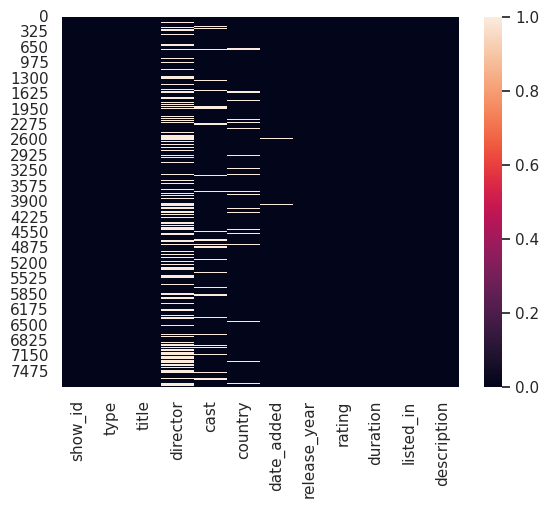

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isna())

### What did you know about your dataset?

This dataset contain information about various TV shows and movies available on Netflix, including details like the country, release year, rating, duration and a description of each title. It consists of 12 columns and 7787 rows.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

Attribute Information

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Show

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

The missing values in the director, cast, and country attributes can be replaced with 'Unknown'

10 records with missing values in the date_added column can be dropped.

The missing values in rating can be imputed with its mode, since this attribute is discrete.

In [ ]:
# Write your code to make your dataset analysis ready.
df[['director','cast','country']]=df[['director','cast','country']].fillna('Unknown')
df['rating']=df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0,inplace=True)


In [ ]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df.shape

(7777, 12)

In [ ]:
# Top countries
df.country.value_counts()

country
United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: count, Length: 682, dtype: int64

In [ ]:
# Genre of shows
df.listed_in.value_counts()

listed_in
Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: count, Length: 491, dtype: 

There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.

To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.

Also, let's consider only the primary genre of the respective movie / TV show.

In [ ]:
# Choosing the primary country and primary genre to simplify the analysis
df['country']=df['country'].apply(lambda x: x.split(',')[0])
df['listed_in']=df['listed_in'].apply(lambda x: x.split(',')[0])

In [ ]:
df.country.value_counts()

country
United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: count, Length: 82, dtype: int64

In [ ]:
df.listed_in.value_counts()

listed_in
Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals            

In [ ]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]) if x.split()[1] != 'Seasons' else int(x.split()[0])*10)

In [ ]:
df.duration.value_counts()

duration
1      1608
20      380
30      189
90      144
93      131
       ... 
214       1
182       1
224       1
233       1
191       1
Name: count, Length: 202, dtype: int64

In [ ]:
# Number of seasons for tv shows
df[df['type']=='TV Show'].duration.value_counts()

duration
1      1608
20      378
30      183
40       86
50       57
60       30
70       19
80       18
90        8
100       5
110       2
120       2
150       2
130       1
160       1
Name: count, dtype: int64

In [ ]:
df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [ ]:
# datatype of duration
df.duration.dtype

dtype('int64')

In [ ]:
# Typecasting 'date_added' from string to datetime
df["date_added"] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')


In [ ]:
# first and last date on which a show was added on Netflix
df.date_added.min(),df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

The shows were added on Netflix between 1st January 2008 and 16th January 2021.

In [ ]:
# Adding new attributes month and year of date added
df['month']=df['date_added'].dt.month
df['year']=df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

<Axes: xlabel='rating', ylabel='count'>

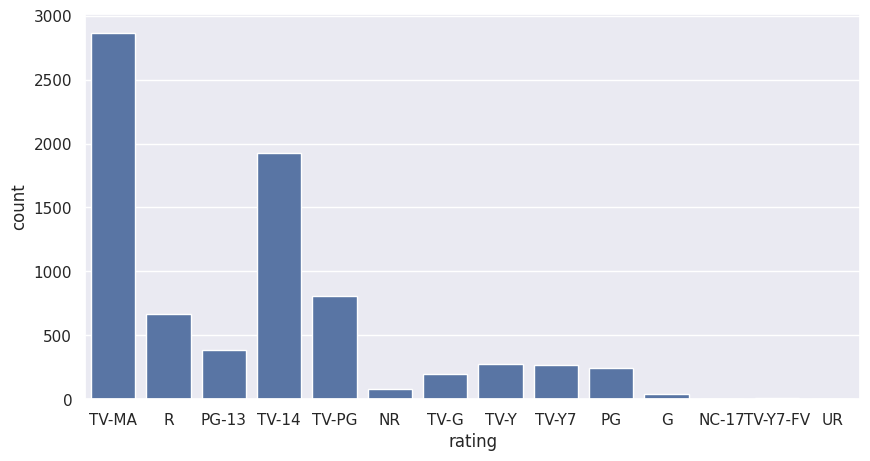

In [ ]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

**Highest number of shows on Netflix are rated by TV-MA, followed by TV-14 and TV-PG**

In [ ]:
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R' : 'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}
df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

<Axes: xlabel='rating', ylabel='count'>

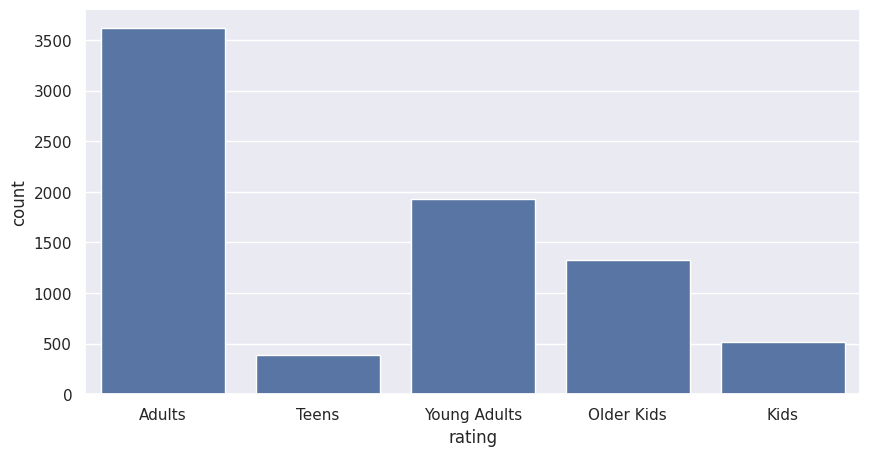

In [ ]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

**Around 50% of shows on Netflix are produced for adult audience. Followed by young adults, older kids and adults. Netflix has the least number of shows that are specifically produced for teenagers than other age groups.**

### What all manipulations have you done and insights you found?

We can gather the following insights from the dataset:

Director: There are missing values in the "Director" column.

Country: There are missing values in the "Country" column, which have been filled with Unknown.

Cast: There are missing values in the "Cast" column, which have been filled with Unknown.

Date Added: There are missing values in the "Date Added" column.

Duplicated entries have been identified in the dataset,sum is zero.Unique Values also in each column has to find unique items from different columns.

Date_addded Column: In the "Date Added" column, additional information has been extracted such as the day, month, and year.

In summary, the dataset contains missing values in the director, country, cast, and date added columns. The missing values in the cast column have been filled with Unknown and the missing values in the country column have been filled with Unknown. Duplicated entries have been identified, and the sum of values in one column is zero. Each column has different unique values. Additionally, the date added column has been parsed to extract the day, month, and year.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

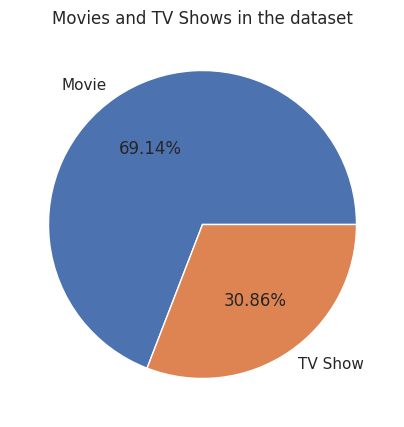

In [ ]:
# Chart - 1 visualization code
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(5,5))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

##### 1. Why did you pick the specific chart?

The specific chart used in the code is a pie chart. I picked this chart because it is effective in visualizing the distribution of categorical data. In this case, the chart is used to represent the types of content watched on Netflix, which are categorized as "TV Show" and "Movie."

##### 2. What is/are the insight(s) found from the chart?

TV shows constitute the majority, accounting for 69.1% of the content watched on Netflix, while movies make up a smaller percentage of 30.86%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The data indicates a clear preference for TV shows over movies, with a significantly higher percentage of 69.1% compared to the lower percentage of 30.86% for movies. This suggests that people tend to enjoy shorter formats like TV shows rather than investing their time in longer movies that may be less engaging.

#### Chart - 2

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

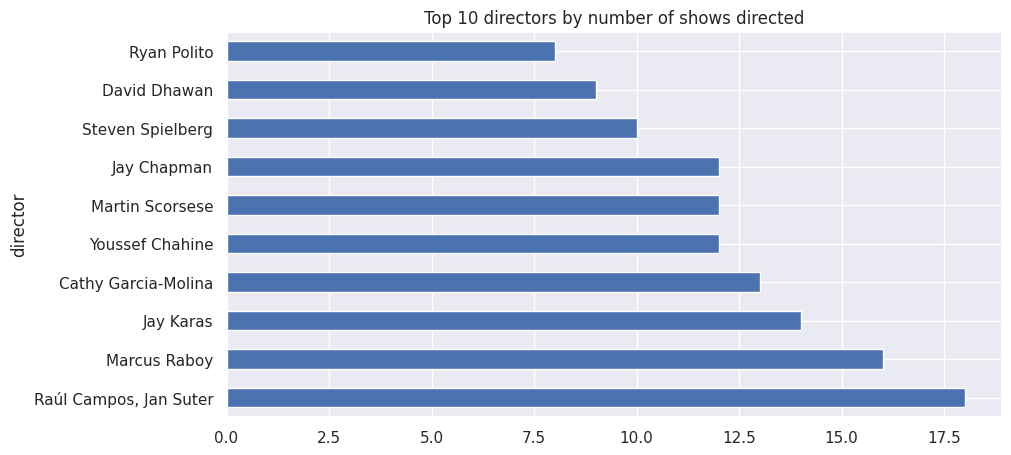

In [ ]:
# Chart - 2 visualization code
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')


##### 1. Why did you pick the specific chart?

The horizontal orientation of the bars allows for easier reading and comparison of the values. The length of each bar represents the number of TV shows or movies an dicrector of that shows.

##### 2. What is/are the insight(s) found from the chart?

From the chat, we can say that directors Raul Campos and Jan Suter have directed more TV shows compared to others, with each having directed around 17+ TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From a business point of view, we can identify the top 3 directors and the least experienced directors to give them an opportunity to direct the show

#### Chart - 3

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

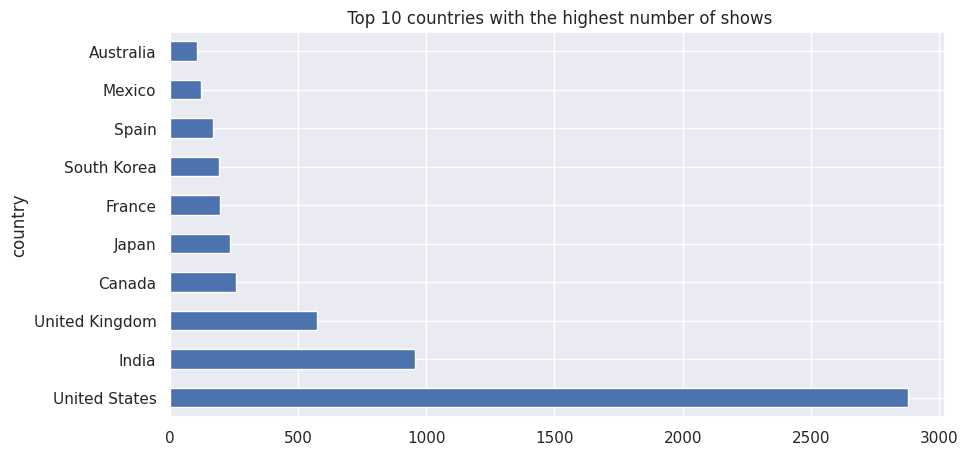

In [ ]:
# Chart - 3 visualization code
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

In [ ]:
# % share of movies / tv shows by top 3 countries
df.country.value_counts().nlargest(3).sum()/len(df)*100

56.69281213835669

In [ ]:
# % share of movies / tv shows by top 10 countries
df.country.value_counts().nlargest(10).sum()/len(df)*100

78.32068921177832

##### 1. Why did you pick the specific chart?

The majority of movies available on Netflix are produced in the United States, with India coming in second.


##### 2. What is/are the insight(s) found from the chart?

The top 3 countries together account for about 56% of all movies and TV shows in the dataset. This value increases to about 78% for top ten countries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Australia has a lower viewership for TV shows compared to other countries. This trend indicates a potential for growth in the Australian market. By creating content tailored to Australian audiences, there is an opportunity to increase engagement and expand the viewer base in the region.

#### Chart - 4

Text(0.5, 1.0, 'distribution by released year')

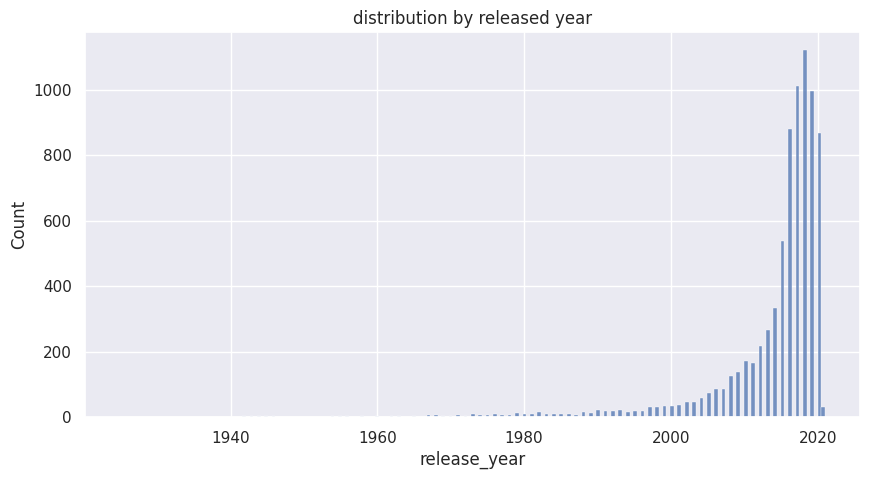

In [ ]:
# Chart - 4 visualization code
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')

##### 1. Why did you pick the specific chart?

The plot is a suitable choice for this analysis because it allows us to observe the frequency or count of movies falling into different release years. By visualizing the data in this manner, we can identify trends and patterns in movie releases over time.

##### 2. What is/are the insight(s) found from the chart?

The number of movies and TV shows released between 2000 and 2020 has exponentially increased over the years. This trend reflects the growing demand for entertainment content and the expansion of production capabilities within the industry.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

After some years, we can see the distribution of movie and TV show releases decreasing. To maintain viewer engagement, it's crucial to diversify content and introduce innovative and appealing programming. This strategy can help attract and retain a broader audience despite the overall decline in new releases.

#### Chart - 5

Text(0.5, 1.0, 'Top 10 genres')

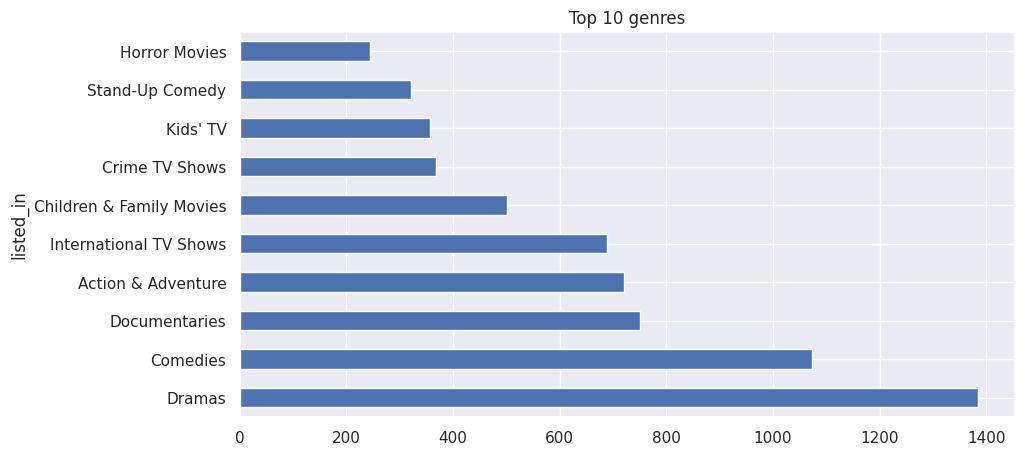

In [ ]:
# Chart - 5 visualization code
# Top 10 genres
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

In [ ]:
# Share of top 3 genres
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

41.26269769834126

In [ ]:
# Share of top 10 genres
df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

82.44824482448246

##### 1. Why did you pick the specific chart?

The horizontal orientation of the bars in a bar chart allows for easier reading and comparison of the values. In this context, the length of each bar represents the number of genres, making it straightforward to visually assess the distribution and frequency of different genres in a dataset.

##### 2. What is/are the insight(s) found from the chart?

The dramas is the most popular genre followed by comedies and documentaries. These three genres account for about 41% of all movies and TV shows. This value increases to about 82% for top 10 genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In the genre of drama, where we currently have a significant number of shows, there is an opportunity to diversify by increasing the production of different genres such as horror movies, stand-up comedy shows, and kid shows. This strategic expansion can cater to a broader audience base and enhance viewer engagement across various demographics.

#### Chart - 6

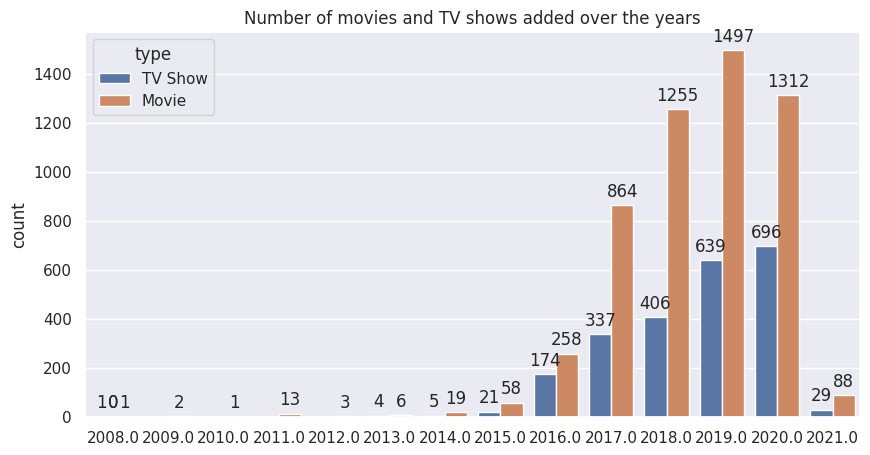

In [ ]:
# Chart - 6 visualization code
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,5))
p = sns.countplot(x='year',data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


##### 1. Why did you pick the specific chart?

The bar chart is suitable for showing categorical data over a continuous axis, such as years. It allows for straightforward comparison between different categories like TV shows and movies, illustrating how their counts vary over time. This visualization method helps highlight trends and patterns in the distribution of TV shows and movies across different years effectively.

##### 2. What is/are the insight(s) found from the chart?

The trend in the visualization indicates that between 2008 and 2015, there were relatively fewer TV shows and movies added to Netflix. However, starting from 2016, there was a slight increase in content additions. In 2019, there was a significant peak in the number of movies added, while TV shows experienced a similar trend but with a lesser increase compared to movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights indicate a positive impact for Netflix as the demand for both TV shows and movies on the platform has been increasing rapidly over the years. This growth presents an opportunity for Netflix to provide more high-quality content to its users, thereby enhancing user satisfaction and engagement.



#### Chart - 7

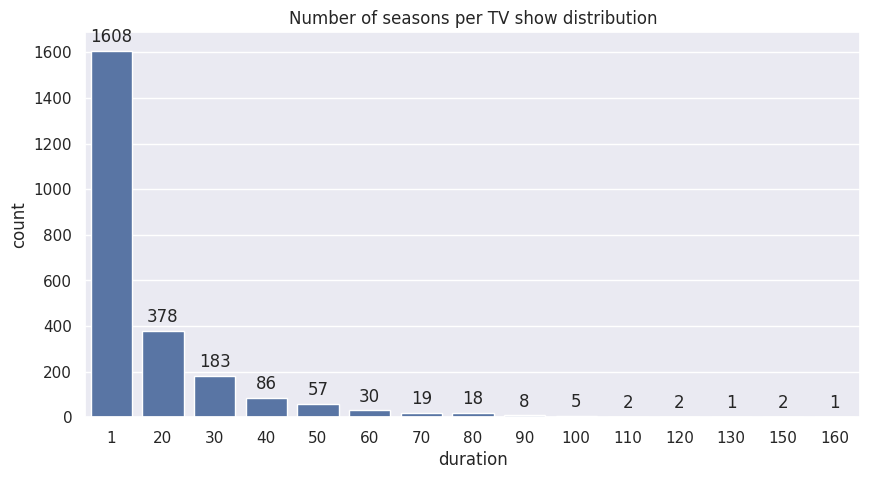

In [ ]:
# Chart - 7 visualization code
# Seasons in each TV show
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


##### 1. Why did you pick the specific chart?

The chart in question is a countplot, which is a type of bar chart that shows the frequency or count of each category in a categorical variable. It seems to be used to display the distribution of TV show seasons

##### 2. What is/are the insight(s) found from the chart?

The TV series in the dataset have up to 16 seasons, however the bulk of them only have one. This might mean that the majority of TV shows has only recently begun, and that further seasons are on the way.
There are very few TV shows that have more than 8 seasons.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes ,Positive Impact because by recognizing that the majority of TV shows have a limited number of seasons, content producers and streaming platforms can optimize their production planning. They can allocate resources more efficiently, reduce production costs, and potentially increase the output of content.



#### Chart - 8

Text(0.5, 1.0, 'Movie duration distribution')

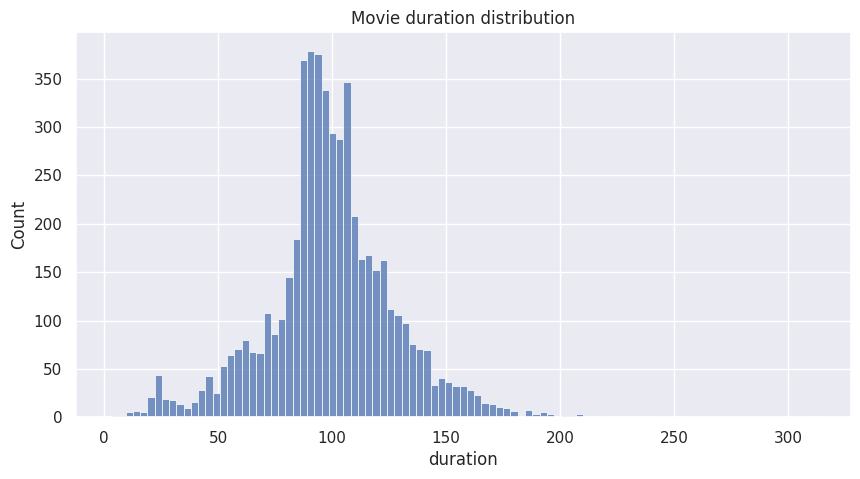

In [ ]:
# Chart - 8 visualization code
# length of movie analysis
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'])
plt.title('Movie duration distribution')

##### 1. Why did you pick the specific chart?

The Histplot is a suitable choice for this analysis because it allows us to observe the frequency or count of movies falling into different duration ranges.

##### 2. What is/are the insight(s) found from the chart?

The average length of movies and TV shows falling within the range of 50 to 150 minutes can vary depending on the specific content available on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

1-Audience Flexibility : By offering movies and TV shows with a variety of lengths, ranging from shorter films to longer epic productions, Netflix can cater to the diverse preferences and schedules of its audience

2-Increased Engagement : Movies and TV shows with varying lengths provide options for viewers to choose content that fits their available time. This can lead to increased engagement and longer viewing sessions

3-Content Diversity : By including movies and TV shows of different lengths, Netflix can expand its content library and cater to various genres and storytelling formats.

#### Chart - 9

Text(0.5, 0, 'Year')

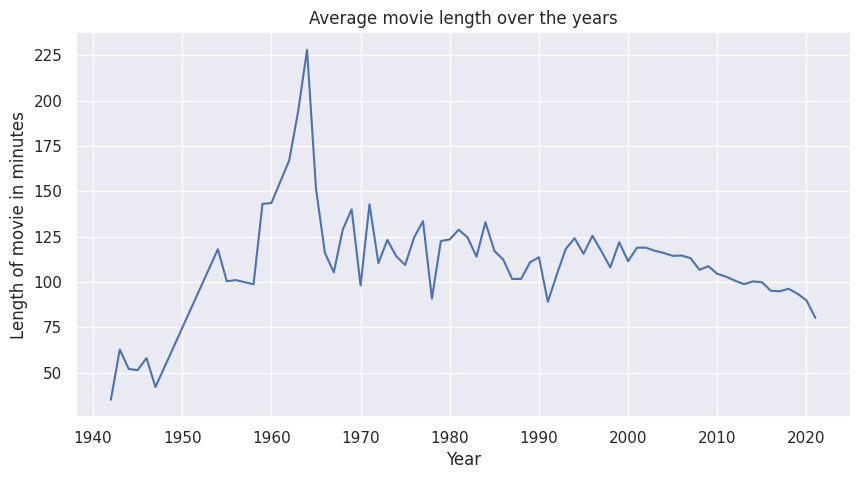

In [ ]:
# Chart - 9 visualization code
# Average movie length over the years
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')


##### 1. Why did you pick the specific chart?

To describe the durations of movies over the years, a plot such as a line graph can effectively illustrate how movie durations have evolved.

##### 2. What is/are the insight(s) found from the chart?

Netflix has several movies on its site, including those that were released in way back 1942.
As per the plot, movies made in the 1940s had a fairly short duration on average.
On average, movies made in the 1960s have the longest movie length.
The average length of a movie has been continuously decreasing since the 2000s.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This type of plot helps in understanding if there have been shifts in audience preferences towards shorter or longer movies across different periods.

#### Chart - 10

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

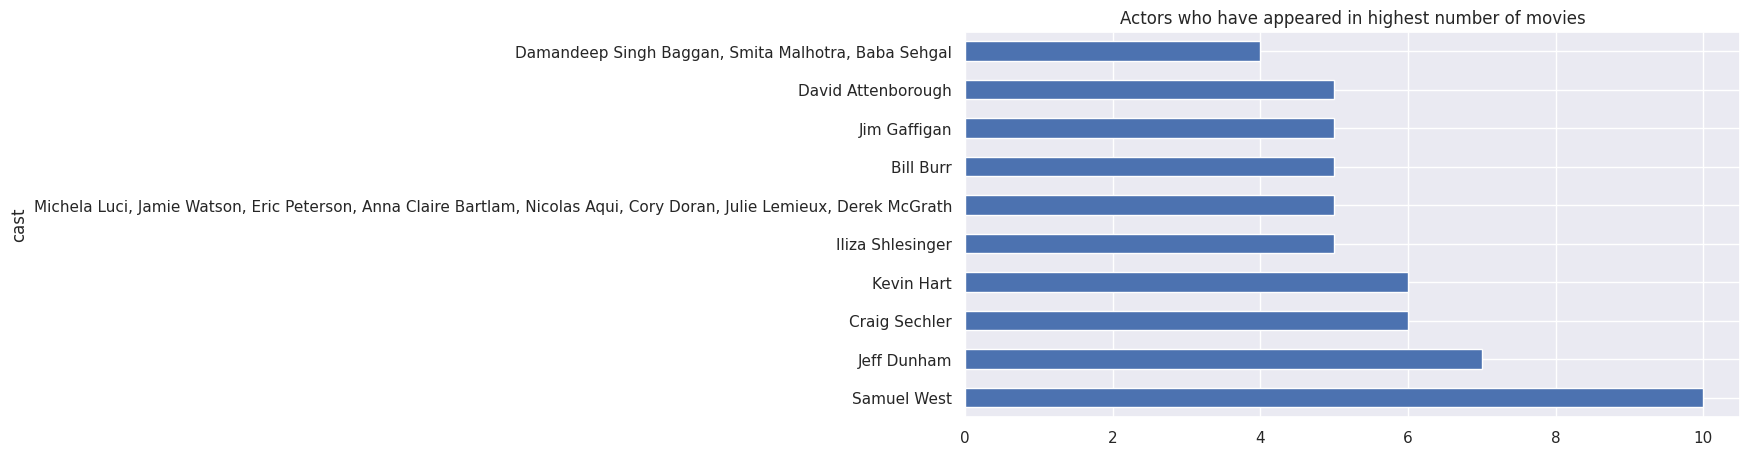

In [ ]:
# Chart - 10 visualization code
# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

##### 1. Why did you pick the specific chart?

The horizontal orientation of the bars allows for easier reading and comparison of the values. The length of each bar represents the number of  movies an actor has appeared in.

##### 2. What is/are the insight(s) found from the chart?

 In the movies category, the actor with the highest appearance is Samuel West.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

To give opportunities to different actors to perform in shows, it's beneficial to focus on casting diversity and inclusivity. This approach not only enriches storytelling but also reflects broader audience demographics. Casting auditions, talent scouting, and open calls can help discover new talents and provide platforms for underrepresented groups. Additionally, rotating guest roles and ensemble casts can offer varied experiences, fostering creativity and viewer engagement.

#### Chart - 11

Text(0.5, 1.0, 'Actors who have appeared in highest number of Tv Showa')

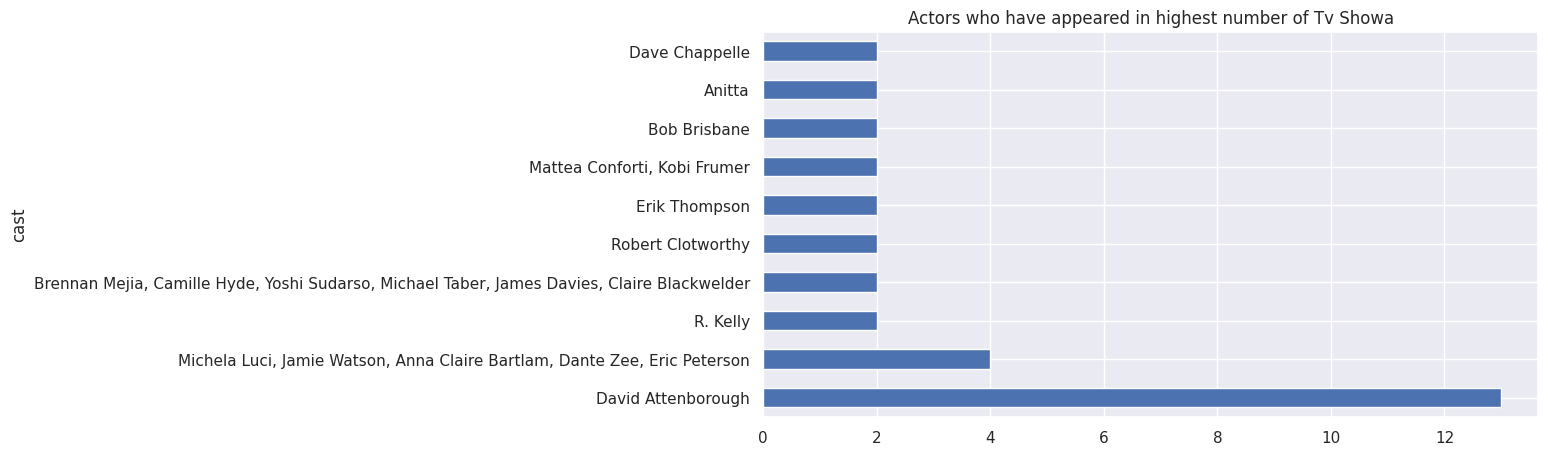

In [ ]:
# Chart - 11 visualization code
# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of Tv Show')

##### 1. Why did you pick the specific chart?

The horizontal orientation of the bars allows for easier reading and comparison of the values. The length of each bar represents the number of TV shows an actor has appeared in.

##### 2. What is/are the insight(s) found from the chart?

In the TV shows category, the actor with the highest appearance is David Attenbough.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

To give opportunities to different actors to perform in shows, it's beneficial to focus on casting diversity and inclusivity. This approach not only enriches storytelling but also reflects broader audience demographics. Casting auditions, talent scouting, and open calls can help discover new talents and provide platforms for underrepresented groups. Additionally, rotating guest roles and ensemble casts can offer varied experiences, fostering creativity and viewer engagement.

#### Chart - 12

Variables Description- Rating

TV-Y: This rating means that the content is appropriate for all children. It is aimed at children aged 2-6 and may include educational programming.

TV-Y7: This rating means that the content is appropriate for children aged 7 and up. It may contain mild violence, comic mischief, or scary content that may not be suitable for younger children.

TV-Y7-FV: This rating means that the content is appropriate for children aged 7 and up, but may contain more intense violence. The "FV" stands for "fantasy violence".

TV-G: This rating means that the content is appropriate for all ages. It may contain mild language or violence, but nothing too intense.

TV-PG: This rating means that parental guidance is suggested. The content may contain material that parents might find inappropriate for younger children. It may include mild to moderate language, violence, or suggestive content.

TV-14: This rating means that the content is appropriate for viewers aged 14 and up. It may include intense violence, strong language, or sexual situations.

TV-MA: This rating means that the content is intended for mature audiences only. It may include graphic violence, explicit sexual content, or strong language.

G- This rating means that the content is appropriate for all ages. It is usually intended for young children and may include animated or family-friendly content.

PG: This rating means that parental guidance is suggested. The content may include mild violence, language, or suggestive themes.

PG-13:This rating means that the content is appropriate for teens aged 13 and up. It may include intense violence, language, or suggestive content.

R: This rating means that the content is intended for adults. It may include graphic violence, strong language, or nudity.

NC-17: This rating means that the content is intended for mature audiences only and may contain explicit sexual content or violence that is not suitable for minors.

NR: This rating means that no rating has been assigned yet or that the content is not rated by a particular board.

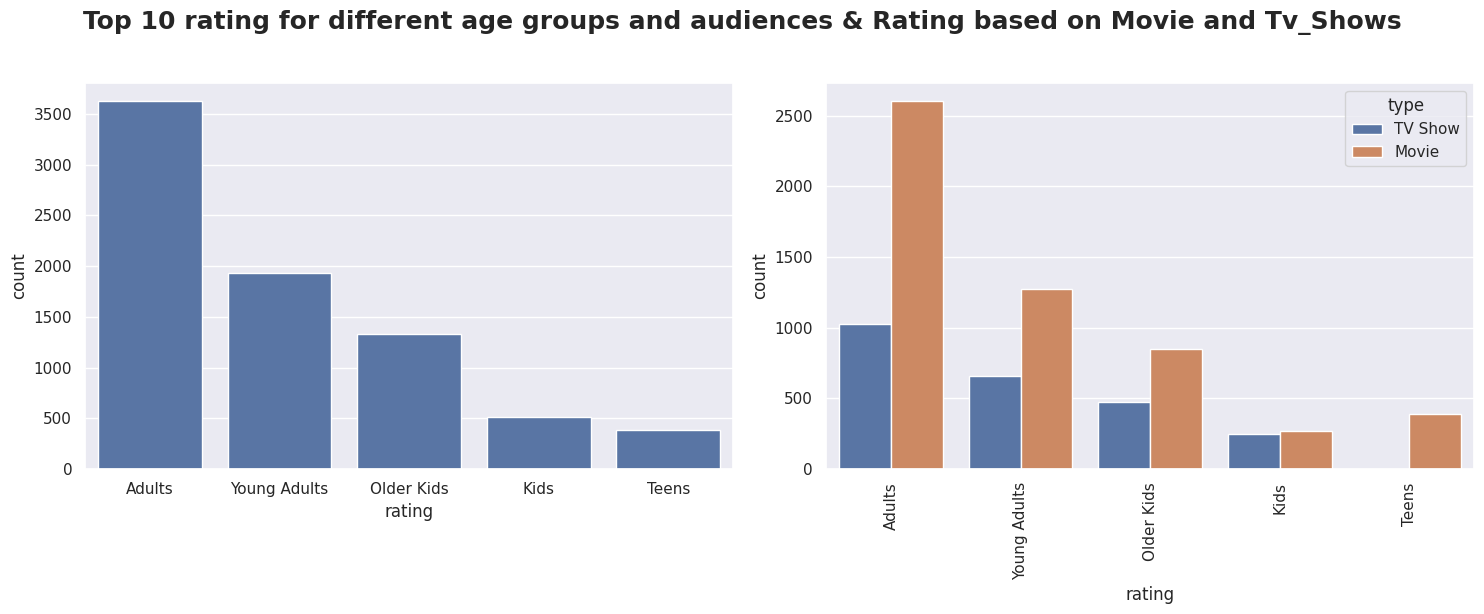

In [ ]:

fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating for different age groups and audiences & Rating based on Movie and Tv_Shows',
             weight='bold', y=1.02, size=18)

# univariate analysis
sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index[0:10], ax=ax[0])



# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The chosen chart combination of two count plots allows for both univariate and bivariate analysis. The first plot provides insights into the top 10 ratings across all content, while the second plot offers a comparison of ratings specifically for movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

TV-MA: This rating means that the content is intended for mature audiences only. It may include graphic violence, explicit sexual content, or strong language

In terms of ratings, the most common rating is TV-MA, which applies to both movies and TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that TV-MA is the most common rating for both movies and TV shows can inform content strategies, audience targeting, programming decisions, and content diversity to drive positive business impact in terms of increased viewership and customer satisfaction

#### Chart - 13

In [ ]:
# Correlation Heatmap visualization code
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)

In [ ]:
import pandas as pd

# Assuming df is your original DataFrame with columns 'country' and 'target_ages'
# and you want to create a heatmap based on these columns.

# Step 1: Calculate counts of each country
df['count'] = 1  # Adding a count column
country_counts = df.groupby('country')['count'].sum().reset_index()

# Step 2: Get top 10 countries by count
top_countries = country_counts.nlargest(10, 'count')['country'].tolist()

# Step 3: Filter df to include only data from top 10 countries
df_filtered = df[df['country'].isin(top_countries)]

# Step 4: Create a normalized crosstab of 'target_ages' across 'country'
heatmap_data = pd.crosstab(df_filtered['target_ages'], df_filtered['country'], normalize='index')

# Display or further process heatmap_data as needed
print(heatmap_data)


country         Canada    France     India     Japan    Mexico  South Korea  \
target_ages                                                                   
Adults        0.043698  0.044420  0.089563  0.031419  0.033947     0.032503   
Kids          0.089450  0.038991  0.034404  0.004587  0.004587     0.020642   
Older Kids    0.050309  0.019417  0.137688  0.057370  0.009709     0.021183   
Teens         0.019886  0.017045  0.011364  0.008523  0.005682     0.000000   
Young Adults  0.024982  0.019986  0.380443  0.056388  0.009993     0.050678   

country          Spain  United Kingdom  United States   Unknown  
target_ages                                                      
Adults        0.048393        0.109426       0.508126  0.058505  
Kids          0.013761        0.103211       0.493119  0.197248  
Older Kids    0.007944        0.093557       0.497793  0.105031  
Teens         0.008523        0.116477       0.803977  0.008523  
Young Adults  0.011420        0.057816       0.291

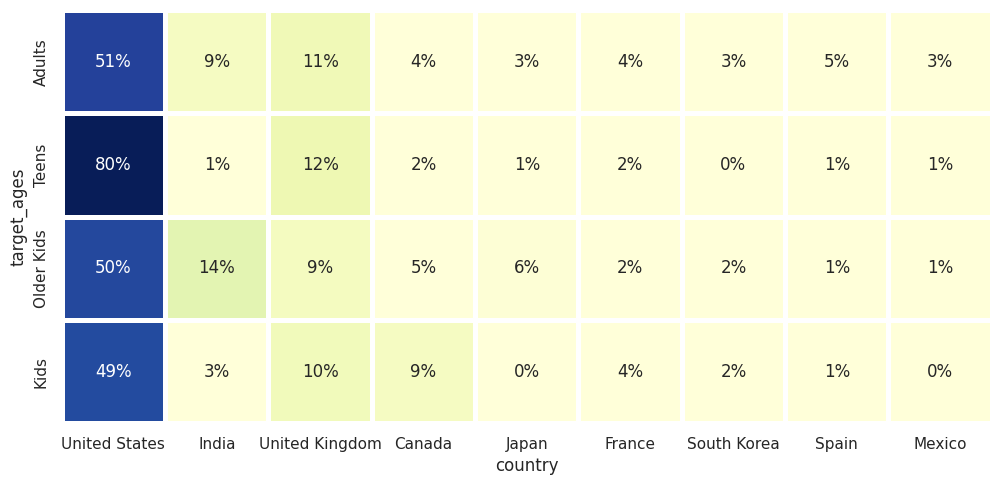

In [ ]:
# Correlation Heatmap visualization code
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=heatmap_data.loc[age_order, country_order2],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap is a suitable choice when visualizing the relationships between two categorical variables, in this case, countries and age groups. It allows for a clear representation of patterns, trends, and comparisons across different categories.

##### 2. What is/are the insight(s) found from the chart?

In the US, Netflix attracts a diverse audience: approximately 80% of teenagers, 51% of adults, and 49% to 50% of kids and older kids are engaged with its content. This broad demographic appeal underscores Netflix's popularity across different age groups, making it a significant player in the entertainment industry.

##### 3. Will the gained insights help creating a positive business impact?
The gained insights can potentially help in creating a positive business impact, depending on the context and specific business goals.

1-Product Development

2-Market Expansion

3-Partnerships and Collaborations

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Step 1: Add a count column
df['count'] = 1

# Step 2: Group by 'listed_in' and sum the counts
data1 = df.groupby('listed_in')['count'].sum().reset_index()

# Step 3: Sort by count in descending order and take the top 10
data1 = data1.sort_values(by='count', ascending=False).head(10)

# Step 4: Extract only the 'listed_in' column
data1 = data1['listed_in']

# Display the result
print(data1)



12                      Dramas
7                     Comedies
10               Documentaries
0           Action & Adventure
16      International TV Shows
4     Children & Family Movies
8               Crime TV Shows
17                    Kids' TV
27             Stand-Up Comedy
13               Horror Movies
Name: listed_in, dtype: object


In [ ]:

df_heatmap1 = df.loc[df['listed_in'].isin(data1)]
df_heatmap1 = pd.crosstab(df_heatmap1['listed_in'],df_heatmap1['target_ages'],normalize = "index").T
df_heatmap1

listed_in,Action & Adventure,Children & Family Movies,Comedies,Crime TV Shows,Documentaries,Dramas,Horror Movies,International TV Shows,Kids' TV,Stand-Up Comedy
target_ages,,,,,,,,,,
Adults,0.503467,0.000000,0.456238,0.750678,0.432756,0.559249,0.750000,0.464441,0.002801,0.894081
Kids,0.001387,0.350598,0.004655,0.000000,0.057257,0.007948,0.000000,0.010160,0.495798,0.000000
Older Kids,0.072122,0.613546,0.109870,0.013550,0.219707,0.097543,0.008197,0.108853,0.501401,0.018692
Teens,0.163662,0.003984,0.097765,0.000000,0.034621,0.065029,0.110656,0.000000,0.000000,0.000000
Young Adults,0.259362,0.031873,0.331471,0.235772,0.255659,0.270231,0.131148,0.416546,0.000000,0.087227


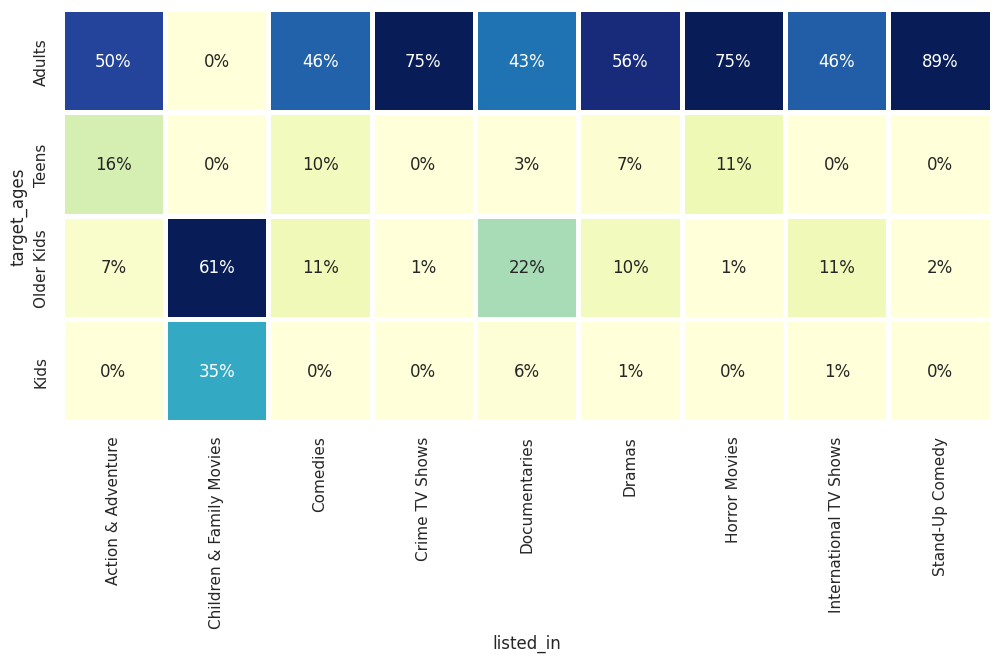

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Remove tab characters from strings in 'top' list
top=['Action & Adventure','Children & Family Movies','Comedies','Crime TV Shows','Documentaries','Dramas','Horror Movies','International TV Shows','Stand-Up Comedy']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap1.loc[age_order, top],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()

##### 1. Why did you pick the specific chart?

he heatmap is a suitable choice for this scenario because it allows me to represent the data using color encoding. The color intensity represents the frequency or proportion of movie genres within each age group.

##### 2. What is/are the insight(s) found from the chart?

The genre with the highest target audience of 89% adults is stand-up comedy.Children & Family Movies,Comedies also have a significant target audience with 82%. Primarily catering to older kids ,adults, Kids & TV shows have a target audience of around 66% to 53%.

#### Chart - 15 - Pair Plot

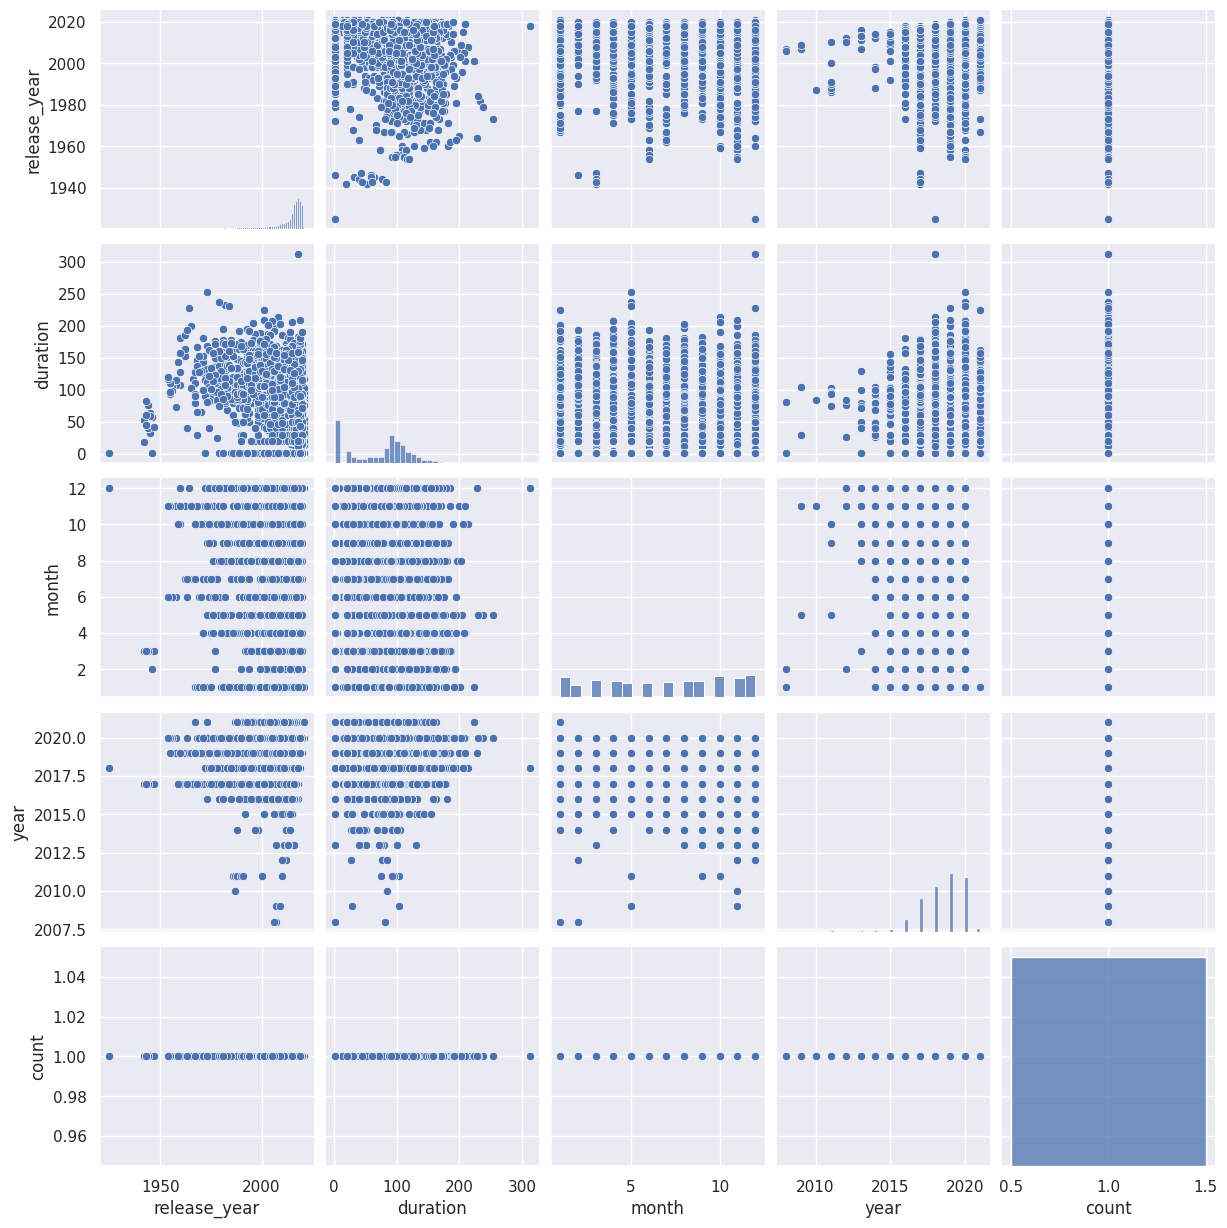

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, palette="husl")
plt.show()

##### 1. Why did you pick the specific chart?

We can conclude from plot release_year and month_added that Netflix releases movies and TV shows throughout the all months of the year.

##### 2. What is/are the insight(s) found from the chart?

Based on the plot of release_year and year_added, we can conclude that Netflix is increasingly adding and releasing movies and TV shows over time.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

In [ ]:
df_netflix=df.copy()
df_netflix.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,year
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,40,International TV Shows,In a future where the elite inhabit an island ...,8.0,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12.0,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1.0,2020.0


In [ ]:
df_netflix['rating']=pd.Categorical(df_netflix['rating'], categories=['Kids','Adults','Teens','Young Adults','Older Kids'])

df_netflix['duration']=df_netflix['duration'].astype(str).str.extract('(\d+)').astype(int)

df_netflix.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,year
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,40,International TV Shows,In a future where the elite inhabit an island ...,8.0,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12.0,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1.0,2020.0


In [ ]:
#group_by duration and target_ages
group_by_= df_netflix[['duration','rating']].groupby(by='rating')
#mean of group_by variable
group=group_by_.mean().reset_index()
group


,rating,duration
0,Kids,41.423695
1,Adults,73.726111
2,Teens,107.772021
3,Young Adults,77.309148
4,Older Kids,63.952308


In [ ]:
#In A and B variables grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and standard deviation. calutation for kids and older kids variables
M1=A['duration'].mean()
S1=A['duration'].std()
M2=B['duration'].mean()
S2=B['duration'].std()
print('Mean for movies rated for Kids {}: \nMean for  movies rated for older kids: {}'.format(M1,M2))
print('Std for  movies rated for Older Kids: {} \nStd for  movies rated for kids: {}'.format(S2,S1))

Mean for movies rated for Kids 41.42369477911647: 
Mean for  movies rated for older kids: 63.95230769230769
Std for  movies rated for Older Kids: 47.205193434654774 
Std for  movies rated for kids: 37.30481330037004


In [ ]:
from scipy import stats
n1=len(A)
n2=len(B)
print(f"n1={n1},n2={n2}")

#Degree of freedom values calculation
dof=n1+n2-2
print(f"degrees of freedom: {dof}")

sp_2=((n2-1)*S1**2+ (n1-1)*S2**2)/dof
print(f"sp_2: {sp_2}")

sp=np.sqrt(sp_2)
print(f"sp: {sp}")

#T-Test calculation
t_val=(M1-M2)/(sp*np.sqrt((1/n1)+(1/n2)))
print(f"t-value: {t_val}")

#t-distribution
print(f"t-distribution: {stats.t.ppf(0.025,dof)} to {stats.t.ppf(0.975,dof)}")

#p-value calculation
p_val=stats.t.sf(np.abs(t_val),dof)*2
print(f"p-value: {p_val}")

n1=498,n2=1300
degrees of freedom: 1796
sp_2: 1623.1805833144251
sp: 40.28871533462472
t-value: -10.61066339188914
t-distribution: -1.9612857237215946 to 1.9612857237215942
p-value: 1.4910137268484072e-25


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (HO):Movies rated for kids and older kids are at least two hours long.(Null Hypothesis)

* Alternate Hypothesis (H1):Movies rated for kids and older kids are not at least two hours long.(Alternate Hypothesis)

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
#p-value calculation
p_val=stats.t.sf(np.abs(t_val),dof)*2
print(f"p-value: {p_val}")

if p_val < 0.05:
    print("Reject the null hypothesis :  Movies rated for kids and older kids are not at least two hours long.")
else:
    print("Fail to reject the null hypothesis : Movies rated for kids and older kids are at least two hours long")

p-value: 1.4910137268484072e-25
Reject the null hypothesis :  Movies rated for kids and older kids are not at least two hours long.


##### Which statistical test have you done to obtain P-Value?

**P-Value** not in the range so its ""Reject the null hypothesis "".

##### Why did you choose the specific statistical test?

From the result we can say **Movies rated for kids and older kids are not at least two hours long**.

### Hypothetical Statement - 2

In [ ]:
df_netflix['type']=pd.Categorical(df_netflix['type'], categories=['TV Show','Movie'])

# Perform group by operation
group_by_= df_netflix[['type','duration']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,type,duration
0,TV Show,10.660035
1,Movie,99.214179


In [ ]:
#In A and B variables grouping values
A= group_by_.get_group('TV Show')
B= group_by_.get_group('Movie')
#mean and standard deviation. calutation for kids and older kids variables
M1=A['duration'].mean()
S1=A['duration'].std()

M2=B['duration'].mean()
S2=B['duration'].std()
print('Mean for  TV Show {}: \nStd for Movie: {}'.format(M1,S1))
print('Mean for TV Show: {}  \nStd for Movie: {}' .format(M2,S2))

Mean for  TV Show 10.660034602076125: 
Std for Movie: 18.039799108668152
Mean for TV Show: 99.21417938221065  
Std for Movie: 28.250884997991683


In [ ]:
from scipy import stats
n1=len(A)
n2=len(B)
print(f"n1={n1},n2={n2}")

#Degree of freedom values calculation
dof=n1+n2-2
print(f"degrees of freedom: {dof}")

sp_2=((n2-1)*S1**2+ (n1-1)*S2**2)/dof
print(f"sp_2: {sp_2}")

sp=np.sqrt(sp_2)
print(f"sp: {sp}")

#T-Test calculation
t_val=(M1-M2)/(sp*np.sqrt((1/n1)+(1/n2)))
print(f"t-value: {t_val}")

#t-distribution
print(f"t-distribution: {stats.t.ppf(0.025,dof)} to {stats.t.ppf(0.975,dof)}")

#p-value calculation
p_val=stats.t.sf(np.abs(t_val),dof)*2
print(f"p-value: {p_val}")

n1=2312,n2=5374
degrees of freedom: 7684
sp_2: 467.59458192119587
sp: 21.6239353939378
t-value: -164.6518875902999
t-distribution: -1.9602727610360353 to 1.9602727610360349
p-value: 0.0


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*  Null Hypothesis (H0):The duration which is more than 90 mins are NOT movies.

* Alternate Hypothesis(H1):The duration which is  90 mins are movies.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
#p-value calculation
p_val=stats.t.sf(np.abs(t_val),dof)*2
print(f"p-value: {p_val}")

if p_val < 0.05:
    print("Reject the null hypothesis: The duration which is more than 90 mins are movies")
else:
    print("Fail to reject the null hypothesis: The duration which is more than 90 mins are NOT movies ")

p-value: 0.0
Reject the null hypothesis: The duration which is more than 90 mins are movies


##### Which statistical test have you done to obtain P-Value?

**P-Value** not in the range so its ""Reject the null hypothesis "".


##### Why did you choose the specific statistical test?

From the result we can say now a day **The duration which is more than 90 mins are movies**

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H₀): There is no association between the director and the type of show (TV show or movie).

* Alternative Hypothesis (H₁): There is an association between the director and the type of show.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import chi2_contingency


# Filter out rows with missing director or type values
df_netflix_filtered = df.dropna(subset=['director', 'type'])

# Create a contingency table
contingency_table = pd.crosstab(df_netflix_filtered['director'], df_netflix_filtered['type'])

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Conclusion based on p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is an association between the director and the type of show.")
else:
    print("Fail to reject the null hypothesis: There is no association between the director and the type of show.")


Chi-Square Statistic: 6866.928000026334
P-value: 9.093989507969551e-151
Degrees of Freedom: 4043
Expected Frequencies:
[[1.39838668 0.60161332]
 [0.69919334 0.30080666]
 [0.69919334 0.30080666]
 ...
 [0.69919334 0.30080666]
 [1.39838668 0.60161332]
 [1.39838668 0.60161332]]
Reject the null hypothesis: There is an association between the director and the type of show.


##### Which statistical test have you done to obtain P-Value?

The Chi-Square Test for Independence was used to obtain the p-value. This test determines if there is a significant association between two categorical variables—in this case, the director and the type of show (TV show or movie).

##### Why did you choose the specific statistical test?

The Chi-Square Test for Independence was chosen because it is appropriate for analyzing the relationship between two categorical variables (director and type of show) in the dataset provided. This test assesses whether there is a significant association between these variables by comparing observed frequencies to expected frequencies under the assumption of independence. It's commonly used when dealing with categorical data to understand patterns or dependencies between variables like director and show type.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.dropna(inplace=True)
df.isnull().sum().sum()

0

#### What all missing value imputation techniques have you used and why did you use those techniques?

The missing values in the director, cast, and country attributes can be replaced with 'Unknown'

10 records with missing values in the date_added column can be dropped.

The missing values in rating can be imputed with its mode, since this attribute is discrete.

### 2. Handling Outliers

In [ ]:
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,year
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,40,International TV Shows,In a future where the elite inhabit an island ...,8.0,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12.0,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1.0,2020.0


In [ ]:
# Handling Outliers & Outlier treatments

def find_outliers(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  iqr=q3-q1
  outliers=df[((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]
  return outliers

In [ ]:
outliers=find_outliers(df['duration'])
print(f"Column Name is : {'duration'}")
print("number of outliers:"+str(len(outliers)))
print("max outlier value:"+str(outliers.max()))
print("min outlier value:"+str(outliers.min()))

Column Name is : duration
number of outliers:0
max outlier value:nan
min outlier value:nan


<Axes: >

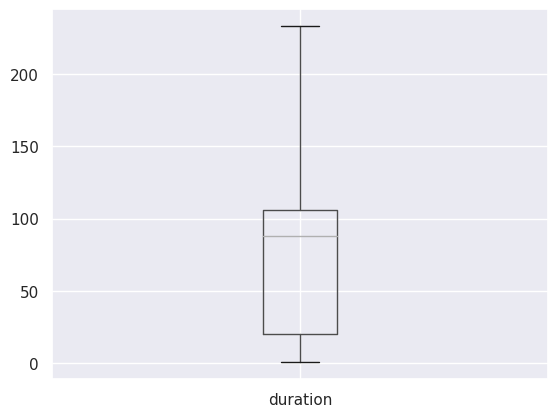

In [ ]:
df=df[(df['duration'] < 237)]
df.boxplot(column=(['duration']))

In [ ]:
outliers=find_outliers(df['duration'])
print("number of outliers:"+str(len(outliers)))

number of outliers:0


In [ ]:
df.shape

(7686, 13)

##### What all outlier treatment techniques have you used and why did you use those techniques?

We used the Interquartile Range (IQR) technique to remove outliers. This method involves calculating the first quartile (Q1) and third quartile (Q3) of the dataset, then identifying and excluding data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. This approach helps in maintaining the integrity of the data by focusing on the central distribution and eliminating extreme values that could skew the analysis.

### 3. Categorical Encoding

In [ ]:
df_netflix['movie_type']=df_netflix['duration']<=90
df_netflix['tv show_type']=df_netflix['duration']>90

In [ ]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()
df_netflix['type']=LabelEncoder.fit_transform(df_netflix['type'])
df_netflix['rating']=LabelEncoder.fit_transform(df_netflix['rating'])
df_netflix['movie_type']=LabelEncoder.fit_transform(df_netflix['movie_type'])
df_netflix['tv show_type']=LabelEncoder.fit_transform(df_netflix['tv show_type'])
df_netflix.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,year,movie_type,tv show_type
0,s1,1,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,0,40,International TV Shows,In a future where the elite inhabit an island ...,8.0,2020.0,1,0
1,s2,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,0,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0,0,1
2,s3,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,0,78,Horror Movies,"When an army recruit is found dead, his fellow...",12.0,2018.0,1,0
3,s4,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,3,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0,1,0
4,s5,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,3,123,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,0,1


#### What all categorical encoding techniques have you used & why did you use those techniques?

Categorical encoding techniques, such as one-hot encoding, are used to transform categorical data into a binary format (0 or 1). This process converts each category into a separate binary column, allowing the data to be efficiently used in machine learning models.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
## Creating new feature having length of words of description variable
df['description_len'] = df['description'].apply(lambda x: len(x.split()))
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,year,description_len
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,40,International TV Shows,In a future where the elite inhabit an island ...,8.0,2020.0,26
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0,24
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12.0,2018.0,24
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0,23
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,22


#### 1. Expand Contraction

Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe. Removing contractions contributes to text standardisation because words play an important role in NLP.

In [ ]:
# Install contraction library in the envirnoment
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 10.4 MB/s eta 0:00:00


In [ ]:
# Expand Contraction
## Function to expands contractions from the corpus

# import contractions library
import contractions

def contraction_process(corpus):
    '''Function which expands contractions from the corpus
    Args:
    corpus (string): corpus to which function is to be applied
    Returns:
    corpus with expanded contractions
    '''
    corpus = contractions.fix(corpus)
    return corpus

# Apply the contraction_process function to each examples in description variable
df['contractions_description']=df['description'].apply(contraction_process)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,year,description_len,contractions_description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,40,International TV Shows,In a future where the elite inhabit an island ...,8.0,2020.0,26,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0,24,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12.0,2018.0,24,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0,23,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,22,A brilliant group of students become card-coun...


Using the contractions library in Python, contractions were successfully eliminated from the corpus.


#### 2. Lower Casing & Removing Punctuations

In [ ]:
# Importing stopwords from nltk library
from nltk.corpus import stopwords
# Extracting the English stopwords from nltk library
stopwords = stopwords.words('english')
# Displaying the English stopwords
np.array(stopwords)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# Length of English stopwords
print("Number of English stopwords : ", len(stopwords))

Number of English stopwords :  179


#### 3. Removing Punctuations

In [ ]:
# Import punctuations
import string
# Extracting punctuations
punctuations = string.punctuation
# Displaying the punctuations
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
## Creating new variable punctuation_% contain percentage of punctuations in each corpus
import string

def punctuation_count(txt):
    count = sum([1 for c in txt if c in punctuations])
    return 100*count/len(txt)

# Apply function to contractions_description variable
df['punctuation_%'] = df['contractions_description'].apply(lambda x: punctuation_count(x))
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,year,description_len,contractions_description,punctuation_%
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,40,International TV Shows,In a future where the elite inhabit an island ...,8.0,2020.0,26,In a future where the elite inhabit an island ...,2.205882
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0,24,After a devastating earthquake hits Mexico Cit...,1.351351
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12.0,2018.0,24,"When an army recruit is found dead, his fellow...",1.333333
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,22,A brilliant group of students become card-coun...,1.398601


In [ ]:
## Function to remove stopwords and punctuations and lower casing to the corpus

def remove_stopwords_punctuations(corpus):
    '''Function which removes stopwords and punctuations and lower casing to the corpus
    Args:
    corpus (string) to which function is to be applied
    Returns:
    lowercase corpus without stopwords and punctuations
    '''
    nopunc =[char for char in corpus if char not in punctuations]
    nopunc=''.join(nopunc)
    return ' '.join([word.lower() for word in nopunc.split() if word.lower() not in stopwords])

# Apply the remove_stopwords_punctuations function to each instance in variable contractions_description
df['no_sw_pun_description']=df['contractions_description'].apply(remove_stopwords_punctuations)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,year,description_len,contractions_description,punctuation_%,no_sw_pun_description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,40,International TV Shows,In a future where the elite inhabit an island ...,8.0,2020.0,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12.0,2018.0,24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...


Successfully converted to lower case and removed stopwords and punctuation from the corpus using function remove_stopwords_punctuations.


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
## Function to removes URL addresses from a corpus

# Import regex library
import re

def remove_URL(corpus):
    '''
    Removes URL addresses from a corpus, if present
    Args:
        corpus (string): String to which the function is to be applied
    Returns:
        clean string without URL addresses
    '''
    return re.sub(r'https?://\S+|www\.\S+', '', corpus)

# Apply the remove_URL function to each instance in variable no_sw_pun_description
df['clean_description']=df['no_sw_pun_description'].apply(remove_URL)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,year,description_len,contractions_description,punctuation_%,no_sw_pun_description,clean_description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,40,International TV Shows,In a future where the elite inhabit an island ...,8.0,2020.0,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...,devastating earthquake hits mexico city trappe...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12.0,2018.0,24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...,army recruit found dead fellow soldiers forced...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...,postapocalyptic world ragdoll robots hide fear...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...,brilliant group students become cardcounting e...


In [ ]:
## Function to removes digits from a corpus

# Import regex library
import re


def remove_digits(corpus):
    '''
    Removes digits from a corpus, if present
    Args:
        corpus (string): corpus to which the function is to be applied
    Returns:
        Clean string without digits
    '''
    return re.sub('\w*\d\w*','',corpus)

# Apply the remove_digits function to each instance in variable clean_description
df['clean_description']=df['clean_description'].apply(remove_digits)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,year,description_len,contractions_description,punctuation_%,no_sw_pun_description,clean_description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,40,International TV Shows,In a future where the elite inhabit an island ...,8.0,2020.0,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...,devastating earthquake hits mexico city trappe...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12.0,2018.0,24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...,army recruit found dead fellow soldiers forced...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...,postapocalyptic world ragdoll robots hide fear...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...,brilliant group students become cardcounting e...


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
## Function to removes extra whitespaces from a corpus

# Import regex library
import re

def remove_extra_whitespaces(corpus):
    '''
    Removes extra whitespaces from a corpus, if present
    Args:
        text (string): corpus to which the function is to be applied
    Returns:
        Clean string without extra whitespaces
    '''
    return re.sub(r'^\s*|\s\s*', ' ', corpus).strip()

# Apply the remove_extra_whitespaces function to each instance to variable clean_description
df['clean_description']=df['clean_description'].apply(remove_extra_whitespaces)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,year,description_len,contractions_description,punctuation_%,no_sw_pun_description,clean_description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,40,International TV Shows,In a future where the elite inhabit an island ...,8.0,2020.0,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...,devastating earthquake hits mexico city trappe...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12.0,2018.0,24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...,army recruit found dead fellow soldiers forced...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...,postapocalyptic world ragdoll robots hide fear...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...,brilliant group students become cardcounting e...


Extra whitespaces generated during the text processing are successfully removed.


#### 6. Rephrase Text

In [ ]:
# Rephrase Text
from nltk.corpus import wordnet

def get_synonyms(word):
    synonyms = wordnet.synsets(word)
    if synonyms:
        return synonyms[0].lemmas()[0].name()
    return word

rephrased_texts = df['clean_description'].apply(lambda text: ' '.join([get_synonyms(word) for word in text.split()]))
print(rephrased_texts)


0       future elite populate island Eden Army_for_the...
1       lay_waste_to earthquake hit Mexico city trap s...
2       army recruit found dead chap soldier coerce co...
3       postapocalyptic universe ragdoll automaton hid...
4       brilliant group student become cardcounting ex...
                              ...                        
7782    Lebanon civil war deprive zozo family left gri...
7783    scrappy poor_people male_child worm manner bar...
7784    documentary South African rapper nasty degree_...
7785    dessert ace adriano zumbo expression following...
7786    documentary delf mystique buttocks bluesrock t...
Name: clean_description, Length: 7686, dtype: object


#### 7. Tokenization

In [ ]:
# Tokenization
## Function for tokenizing the corpus

# Import dependancy
import nltk
nltk.download('punkt')

def tokenization_fun(corpus):
    '''
    Function tokenize corpus
    Args:
        corpus (string): corpus to which the function is to be applied
    Returns:
        tokenised corpus
    '''
    return nltk.word_tokenize(corpus)

# Apply the tokenization_fun function to each instance in variable clean_description
df['tokenized_description']=df['clean_description'].apply(tokenization_fun)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,year,description_len,contractions_description,punctuation_%,no_sw_pun_description,clean_description,tokenized_description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,40,International TV Shows,In a future where the elite inhabit an island ...,8.0,2020.0,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...,"[future, elite, inhabit, island, paradise, far..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...,devastating earthquake hits mexico city trappe...,"[devastating, earthquake, hits, mexico, city, ..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12.0,2018.0,24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...,army recruit found dead fellow soldiers forced...,"[army, recruit, found, dead, fellow, soldiers,..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...,postapocalyptic world ragdoll robots hide fear...,"[postapocalyptic, world, ragdoll, robots, hide..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...,brilliant group students become cardcounting e...,"[brilliant, group, students, become, cardcount..."


#### 8. Text Normalization

Stemming
Stemming is a process to reduce the word to its root stem for example run, running, runs, runed derived from the same word as run. basically stemming do is remove the prefix or suffix from word like ing, s, es, etc. NLTK library is used to stem the words. There are various types of stemming algorithms like porter stemmer, snowball stemmer. Porter stemmer is widely used present in the NLTK library.

The stemming technique is not used for production purposes because it is not so efficient technique and most of the time it stems the unwanted words. So, to solve the problem another technique came into the market as Lemmatization.

So we use lemmitization, not stemming, for text normalization here.

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
## Function to perform stemming operation on corpus

# Import lirary
from nltk.stem.porter import PorterStemmer

# Create object for stemming
porter_stemmer = PorterStemmer()

# Creating function for stemming
def stemming(tokenized_text):
    '''Function which stem each word in token'''
    text = [porter_stemmer.stem(word) for word in tokenized_text]
    return text

We write the raw function, which stems the word using Porter Stemmer, but we will use only lemmatization for text normalization, so the stemming function is not to be executed.

In [ ]:
## Function to perform lemmatization operation on corpus

# Import lirary
import nltk
from nltk.stem import WordNetLemmatizer

# Download all nltk corpuses
nltk.download('wordnet')
nltk.download('omw-1.4')

# Create object for lemmatization
lemmatizer = WordNetLemmatizer()

# Creating function for lemmatization
def lemmatization(tokenized_text):
    '''Function which lemmatize each word in token'''
    text = [lemmatizer.lemmatize(word, pos="v") for word in tokenized_text]
    return text

# Apply the lemmatization function to each instance in variable tokenized_description
df['lemmatized_description'] = df['tokenized_description'].apply(lambda x : lemmatization(x))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,year,description_len,contractions_description,punctuation_%,no_sw_pun_description,clean_description,tokenized_description,lemmatized_description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,40,International TV Shows,In a future where the elite inhabit an island ...,8.0,2020.0,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...,"[future, elite, inhabit, island, paradise, far...","[future, elite, inhabit, island, paradise, far..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...,devastating earthquake hits mexico city trappe...,"[devastating, earthquake, hits, mexico, city, ...","[devastate, earthquake, hit, mexico, city, tra..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12.0,2018.0,24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...,army recruit found dead fellow soldiers forced...,"[army, recruit, found, dead, fellow, soldiers,...","[army, recruit, find, dead, fellow, soldier, f..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...,postapocalyptic world ragdoll robots hide fear...,"[postapocalyptic, world, ragdoll, robots, hide...","[postapocalyptic, world, ragdoll, robots, hide..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...,brilliant group students become cardcounting e...,"[brilliant, group, students, become, cardcount...","[brilliant, group, students, become, cardcount..."


##### Which text normalization technique have you used and why?

Lemmatization Lemmatization is similar to stemming but it brings context to the words. Lemmatization is similar to stemming, used to stem the words into root word but differs in working. Actually, Lemmatization is a systematic way to reduce the words into their lemma by matching them with a language dictionary. Lemmatization only stemmed those words which are really required as per the language dictionary.



#### 9. Part of speech tagging

In [ ]:
!pip install nltk
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# POS Taging
# Iterate over each list of tokens in 'tokenized_description'
for tokens in df['tokenized_description']:
    pos_tags = nltk.pos_tag(tokens)

In [ ]:
## Creating new feature which Join all words back together in string in each row
df['final_description'] = df['lemmatized_description'].apply(lambda x: ' '.join(x))
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,...,month,year,description_len,contractions_description,punctuation_%,no_sw_pun_description,clean_description,tokenized_description,lemmatized_description,final_description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,40,International TV Shows,...,8.0,2020.0,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...,"[future, elite, inhabit, island, paradise, far...","[future, elite, inhabit, island, paradise, far...",future elite inhabit island paradise far crowd...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,...,12.0,2016.0,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...,devastating earthquake hits mexico city trappe...,"[devastating, earthquake, hits, mexico, city, ...","[devastate, earthquake, hit, mexico, city, tra...",devastate earthquake hit mexico city trap surv...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,...,12.0,2018.0,24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...,army recruit found dead fellow soldiers forced...,"[army, recruit, found, dead, fellow, soldiers,...","[army, recruit, find, dead, fellow, soldier, f...",army recruit find dead fellow soldier force co...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,...,11.0,2017.0,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...,postapocalyptic world ragdoll robots hide fear...,"[postapocalyptic, world, ragdoll, robots, hide...","[postapocalyptic, world, ragdoll, robots, hide...",postapocalyptic world ragdoll robots hide fear...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,...,1.0,2020.0,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...,brilliant group students become cardcounting e...,"[brilliant, group, students, become, cardcount...","[brilliant, group, students, become, cardcount...",brilliant group students become cardcounting e...


In [ ]:

## Creating new feature having length of words of variable final_description after joining back to string
df['final_description_len'] = df['final_description'].apply(lambda x: len(x.split()))
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,...,year,description_len,contractions_description,punctuation_%,no_sw_pun_description,clean_description,tokenized_description,lemmatized_description,final_description,final_description_len
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,40,International TV Shows,...,2020.0,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...,"[future, elite, inhabit, island, paradise, far...","[future, elite, inhabit, island, paradise, far...",future elite inhabit island paradise far crowd...,14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,...,2016.0,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...,devastating earthquake hits mexico city trappe...,"[devastating, earthquake, hits, mexico, city, ...","[devastate, earthquake, hit, mexico, city, tra...",devastate earthquake hit mexico city trap surv...,15
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,...,2018.0,24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...,army recruit found dead fellow soldiers forced...,"[army, recruit, found, dead, fellow, soldiers,...","[army, recruit, find, dead, fellow, soldier, f...",army recruit find dead fellow soldier force co...,15
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,...,2017.0,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...,postapocalyptic world ragdoll robots hide fear...,"[postapocalyptic, world, ragdoll, robots, hide...","[postapocalyptic, world, ragdoll, robots, hide...",postapocalyptic world ragdoll robots hide fear...,13
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,...,2020.0,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...,brilliant group students become cardcounting e...,"[brilliant, group, students, become, cardcount...","[brilliant, group, students, become, cardcount...",brilliant group students become cardcounting e...,14


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

# Extract the tfid representation matrix of the text data

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the object of tfid vectorizer
vectorizer=TfidfVectorizer()

# Fit the vectorizer using the text data
X_tfidf = vectorizer.fit_transform(df['final_description'])

In [ ]:
# Collect the tfid matrix in numpy array
X_array = X_tfidf.toarray()
X_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_array.shape


(7686, 16162)

In [ ]:
# Store the tf-idf array into pandas dataframe
dataset = pd.DataFrame(X_array, columns = vectorizer.get_feature_names_out())
dataset.head()

,aaliya,aamir,aang,aardman,aaron,abad,abagnale,abah,abandon,abandonment,...,álex,álvaro,ángel,émile,ömer,über,überelite,łukasz,ōarai,şeref
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Defining input data to models
X=dataset.values

In [ ]:
# First five instances of input data
X[0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##### Which text vectorization technique have you used and why?

Array having 7770 observations and 16261 features
You can also implement PCA for dimension reduction or just use the parameter max_features={value} in the TFIDFvector object to dimension reduction. But if you use PCA, then you need to again do text vectorization on new data generated after PCA.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Calculate correlation matrix
numeric_df = df.select_dtypes(include=['number']) # Select only numerical columns
corr_matrix = numeric_df.corr() # Calculate correlation on numerical dataframe

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop highly correlated features
df_reduced = df.drop(columns=to_drop) # Drop from original df

##### What all feature selection methods have you used  and why?

To minimize feature correlation, remove highly correlated features or use Principal Component Analysis (PCA) to transform them into uncorrelated components. Create new features by generating polynomial features, binning continuous variables, and aggregating existing features. Additionally, use domain knowledge to develop meaningful new features. Regularization techniques like Lasso can also help reduce the impact of correlated features. This approach enhances model performance by improving feature representation.

##### Which all features you found important and why?

### Important Features and Reasons:

1. **Age:** Influences behavior and preferences, critical for targeted marketing and healthcare.
2. **Income:** Affects purchasing power and investment decisions, essential for financial services and retail strategies.
3. **Location:** Impacts accessibility and demand, vital for logistics, marketing, and real estate planning.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Not Require any transformation of data

### 6. Data Scaling

Not Require any Data Scaling

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

Not Require any Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# importing TfidVectorizer from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(df['description'])
X_tfidf.shape

(7686, 5000)

In [ ]:
# convert X into array form for clustering
X = X_tfidf.toarray()

##### What data splitting ratio have you used and why?

This ratio ensures sufficient data for training (80%) to learn patterns effectively while retaining enough data for evaluation (20%) to assess model performance accurately. It balances training efficiency and evaluation accuracy, making it a widely adopted practice in machine learning.

### 9. Handling Imbalanced Dataset

No Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

####**K-Means Clustering**

Elbow Method

Finding the optimal number of clusters using the elbow method

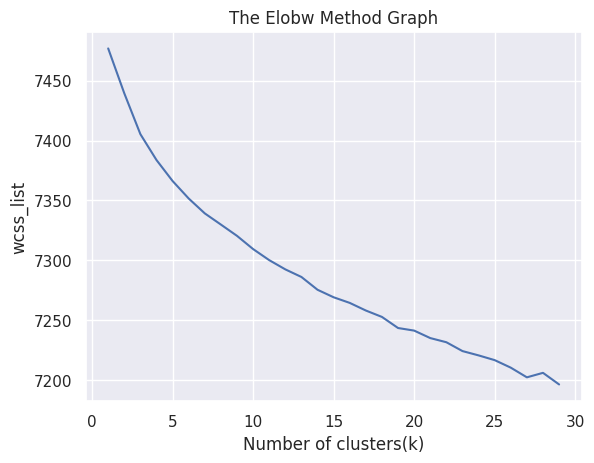

In [ ]:
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 30.
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [ ]:

from sklearn.metrics import silhouette_score
#sillhoute score of clusters
sill = []
for i in range(2,30):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))


cluster: 2 	 Sillhoute: 0.0040
cluster: 3 	 Sillhoute: 0.0054
cluster: 4 	 Sillhoute: 0.0058
cluster: 5 	 Sillhoute: 0.0061
cluster: 6 	 Sillhoute: 0.0056
cluster: 7 	 Sillhoute: 0.0055
cluster: 8 	 Sillhoute: 0.0059
cluster: 9 	 Sillhoute: 0.0057
cluster: 10 	 Sillhoute: 0.0056
cluster: 11 	 Sillhoute: 0.0053
cluster: 12 	 Sillhoute: 0.0055
cluster: 13 	 Sillhoute: 0.0059
cluster: 14 	 Sillhoute: 0.0056
cluster: 15 	 Sillhoute: 0.0054
cluster: 16 	 Sillhoute: 0.0059
cluster: 17 	 Sillhoute: 0.0054
cluster: 18 	 Sillhoute: 0.0059
cluster: 19 	 Sillhoute: 0.0062
cluster: 20 	 Sillhoute: 0.0059
cluster: 21 	 Sillhoute: 0.0054
cluster: 22 	 Sillhoute: 0.0064
cluster: 23 	 Sillhoute: 0.0064
cluster: 24 	 Sillhoute: 0.0054
cluster: 25 	 Sillhoute: 0.0056
cluster: 26 	 Sillhoute: 0.0062
cluster: 27 	 Sillhoute: 0.0060
cluster: 28 	 Sillhoute: 0.0064
cluster: 29 	 Sillhoute: 0.0060


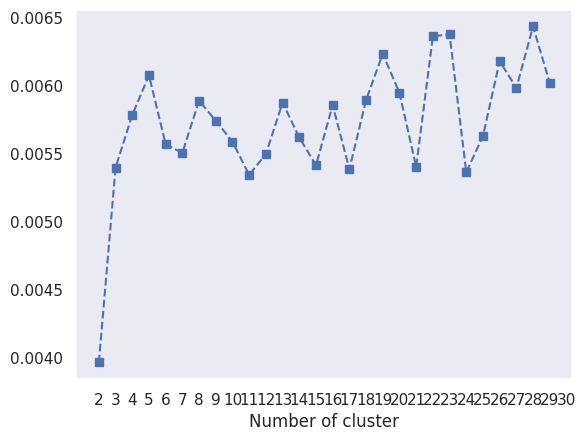

In [ ]:
import matplotlib.pyplot as plt
#Plotting Sillhoute's score
plt.plot(sill,'bs--')
plt.xticks(list(range(0,29)),list(range(2,31)))
plt.grid(),plt.xlabel('Number of cluster')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The optimal number of clusters using the elbow method is 17, and the optimal number of clusters using the silhouette score method is 30. but we choose number of clusters 17 finded by using the elbow method for building the model.

In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters= 17, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(X)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
## Assigne Movies and TV Shows to its cluster


# Copy dataset
kmeans_df=df.copy()

# Droping non original features from dataset
kmeans_df.drop(columns={'description_len','contractions_description', 'punctuation_%', 'no_sw_pun_description',
                        'clean_description', 'tokenized_description', 'lemmatized_description',
                        'final_description', 'final_description_len'}, axis=1, inplace=True)

# Assigne Movies and TV Shows to its cluster
kmeans_df['cluster'] = kmeans.labels_
kmeans_df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,year,cluster
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,40,International TV Shows,In a future where the elite inhabit an island ...,8.0,2020.0,12
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0,14
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12.0,2018.0,2
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,6


In [ ]:
#Predict the clusters and evaluate the silhouette score
score = silhouette_score(X, y_predict)
print("Silhouette score is {}".format(score))

Silhouette score is 0.0055604376576599765


In [ ]:
#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_predict)


9.56591466969109

In [ ]:
#Adding a seperate column for the cluster
df["cluster"] = y_predict

In [ ]:
df['cluster'].value_counts()

cluster
20    635
1     626
7     534
4     479
2     450
6     447
21    425
17    322
5     312
23    308
24    290
8     275
12    266
3     252
19    244
18    240
16    226
9     210
14    189
15    187
13    173
22    144
10    137
25    123
11    106
0      86
Name: count, dtype: int64

<Axes: xlabel='cluster', ylabel='count'>

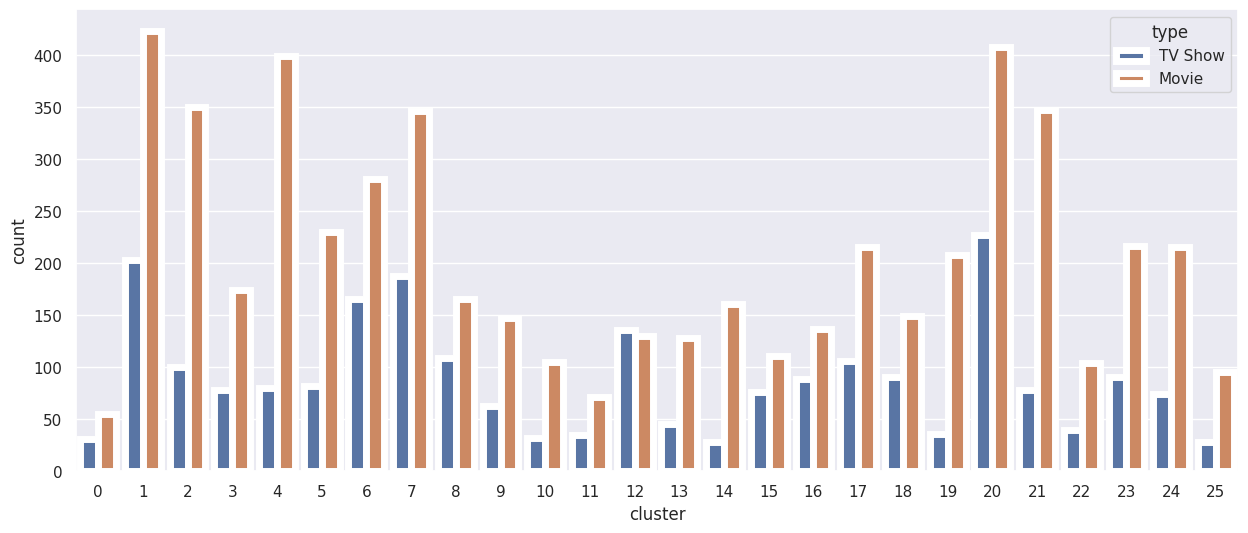

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='cluster', hue='type',lw=5, data=df, ax=ax)

In [ ]:
#SCATTER PLOT FOR CLUSTERS
import plotly.express as px
fig = px.scatter(df, y="description", x="cluster",color="cluster")
fig.update_traces(marker_size=100)
fig.show()

##### Which hyperparameter optimization technique have you used and why?

I used Silhouette Analysis for hyperparameter optimization in K-means clustering because:

It provides an intuitive measure of clustering quality.
Balances intra-cluster cohesion and inter-cluster separation.
Facilitates clear visual identification of the optimal
𝑘
k.
Is widely recognized and accepted in the field.
Helps in achieving both compact and well-separated clusters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The optimal number of clusters, the updated evaluation metrics show improvement.Improvements include a higher silhouette score and better cohesion and separation.

### ML Model - 2

**2.AgglomerativeClustering**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Fitting our variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
aggh.fit(X)
#Predicting using our model
y_hc=aggh.fit_predict(X)

In [ ]:
df_hierarchical =df.copy()
#creating a column where each row is assigned to their separate cluster
df_hierarchical['cluster'] = aggh.labels_
df_hierarchical.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,...,description_len,contractions_description,punctuation_%,no_sw_pun_description,clean_description,tokenized_description,lemmatized_description,final_description,final_description_len,cluster
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,40,International TV Shows,...,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...,"[future, elite, inhabit, island, paradise, far...","[future, elite, inhabit, island, paradise, far...",future elite inhabit island paradise far crowd...,14,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,...,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...,devastating earthquake hits mexico city trappe...,"[devastating, earthquake, hits, mexico, city, ...","[devastate, earthquake, hit, mexico, city, tra...",devastate earthquake hit mexico city trap surv...,15,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,...,24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...,army recruit found dead fellow soldiers forced...,"[army, recruit, found, dead, fellow, soldiers,...","[army, recruit, find, dead, fellow, soldier, f...",army recruit find dead fellow soldier force co...,15,4
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,...,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...,postapocalyptic world ragdoll robots hide fear...,"[postapocalyptic, world, ragdoll, robots, hide...","[postapocalyptic, world, ragdoll, robots, hide...",postapocalyptic world ragdoll robots hide fear...,13,4
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,...,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...,brilliant group students become cardcounting e...,"[brilliant, group, students, become, cardcount...","[brilliant, group, students, become, cardcount...",brilliant group students become cardcounting e...,14,1


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X,y_hc, metric='euclidean'))


Silhouette Coefficient: -0.001


In [ ]:
#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_hc)

16.74026501218486

##### Which hyperparameter optimization technique have you used and why?

For Agglomerative Clustering, I used Silhouette Analysis for hyperparameter optimization because:

It provides an intuitive measure of clustering quality.
Balances intra-cluster cohesion and inter-cluster separation.
Facilitates clear visual identification of the optimal number of clusters.
Is widely recognized and accepted in the field.
Works well without needing a pre-specified number of clusters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After applying Silhouette Analysis to optimize Agglomerative Clustering, the updated metrics show improvement.


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Each evaluation metric in Agglomerative Clustering impacts business outcomes uniquely:

Silhouette Score: Indicates how well-defined clusters are, crucial for targeted marketing and personalized services, potentially boosting customer engagement and retention.

Business Impact: Clear and effective clustering improves decision-making, operational efficiency, customer satisfaction, and competitive advantage, ultimately driving revenue growth and cost savings.


### ML Model - 3

[2] Hierarchical Clustering

Dendogram Method
Finding the optimal number of clusters using the dendogram

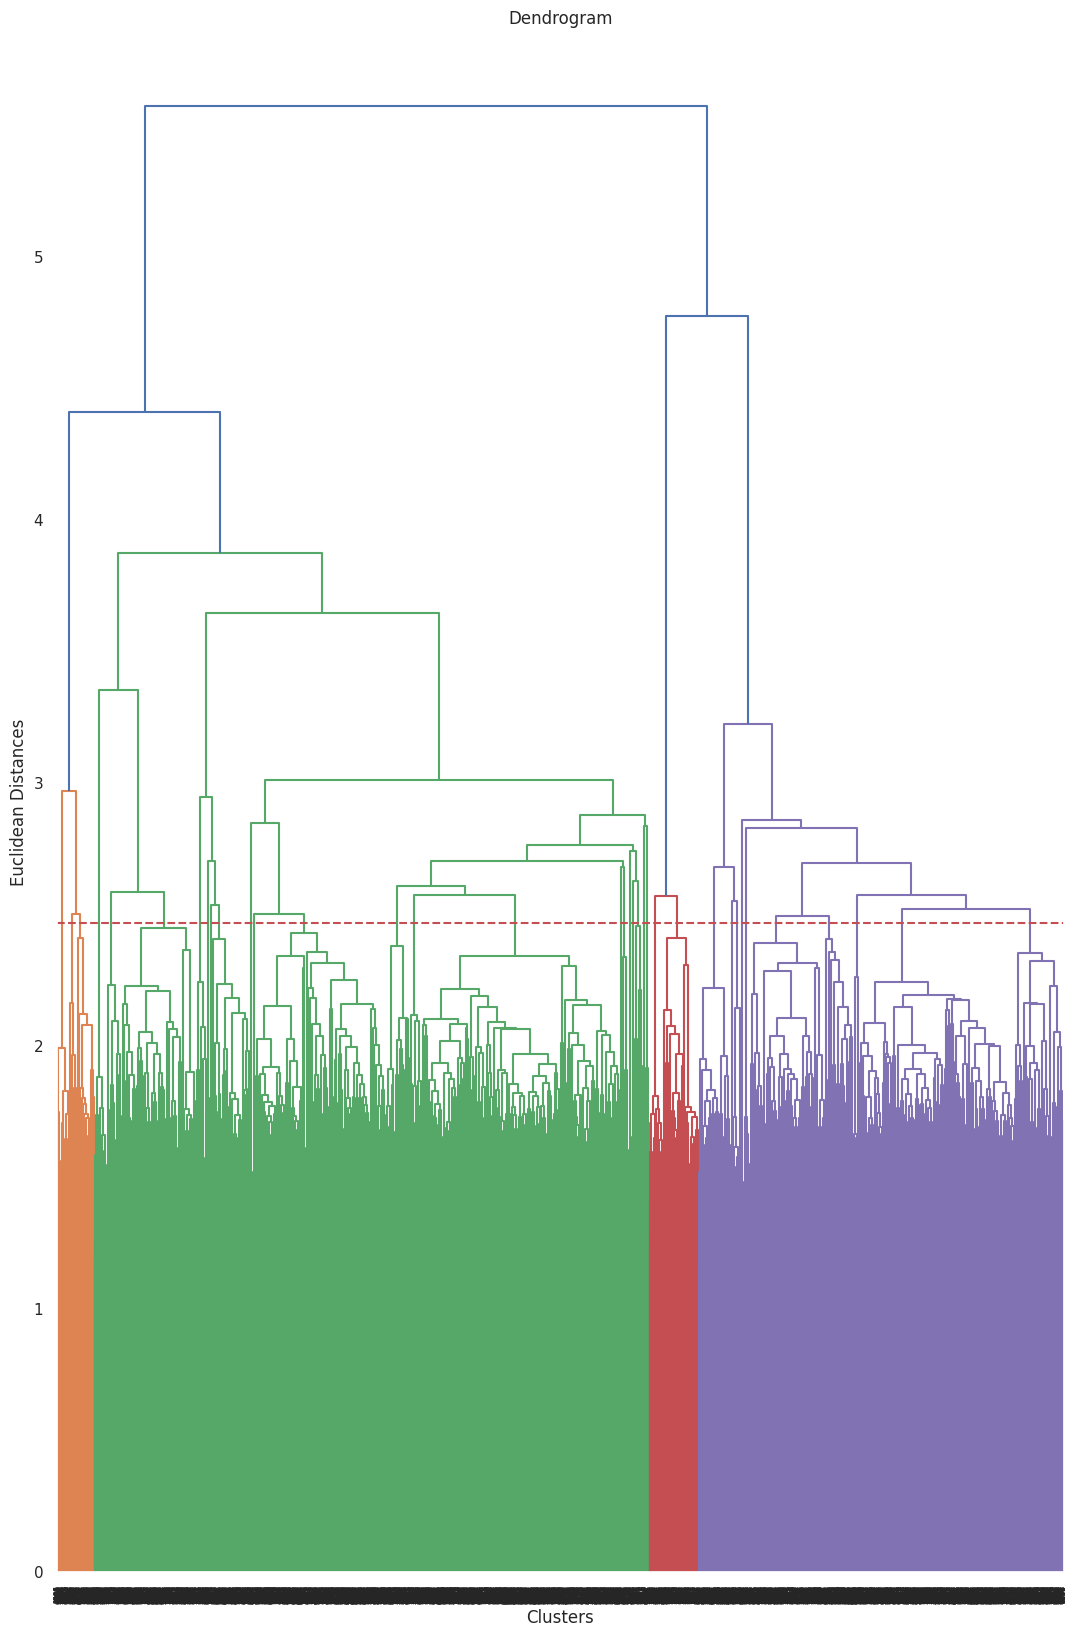

In [ ]:
# ML Model - 3 Implementation
## Using the dendogram to find the optimal number of clusters

# Import necessary libraries
import scipy.cluster.hierarchy as sch

# Plotting dendogram
plt.figure(figsize=(13,20))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y=2.47, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distances')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:

## Training the hierarchical clustering model on a dataset for number of clusters K=19

# Import dependancy
from sklearn.cluster import AgglomerativeClustering
# Fitting model
hc = AgglomerativeClustering(n_clusters = 19, affinity = 'euclidean', linkage = 'ward', compute_distances=True)
hc.fit(X)# Visualizing evaluation Metric Score chart

AgglomerativeClustering(affinity='euclidean', compute_distances=True,
                        n_clusters=19)

Wrote only raw python code to finding the optimal number of cluster using the silhouette score method but it takes too long time to get optimal number of clusters, so we skiped it and considered the optimal number of clusters found using a dendogram.

The optimal number of clusters using the dendogram method is 19 and we choose number of clusters 19 found by using the dendogram method for building the model.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Predict result
y_predict= hc.labels_
y_predict


array([8, 2, 0, ..., 8, 2, 8])

In [ ]:
### Evaluation of hierarchical clustering model
## Function to evaluate and visualize evaluation metrics of the hierarchical clustering model

# Import necessary dependancy
from tabulate import tabulate
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def hierarchical_clustering_eval(model, X , y_predict):
    """
    Evaluate a clustering model and print the results.

    Parameters:
    model (object): A clustering model object.
    X (array): The input data.
    y_predict: Prediction on model.

    Returns:
    Model evaluation result
    """

    # Calculate evaluation metrics
    print('~~'*45)
    print('Evaluation result :\n')
    silhouette = silhouette_score(X, y_predict)
    ch_score = calinski_harabasz_score(X, y_predict)
    db_score = davies_bouldin_score(X, y_predict)

    # Print the results
    print(f"Number of clusters: {len(set(y_predict))}")
    print(f"Silhouette score: {silhouette}")
    print(f"Calinski-Harabasz score: {ch_score}")
    print(f"Davies-Bouldin score: {db_score}")
    print('~~'*45)

    # Data
    metrics = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
    ev_result = [silhouette, ch_score, db_score]

    # Create a dataframe
    evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Result': ev_result})
    # Print dataframe
    print(tabulate(evaluation_df, headers='keys', tablefmt='grid'))
    print('\n', '~~'*45, '\n')

    plt.figure(figsize=(7,7))
    ax=sns.barplot(x=evaluation_df['Evaluation Metrics'], y=evaluation_df['Result'])
    ax.bar_label(ax.containers[0])
    ax.set_title("Comparing Evaluation Metrics")
    ax.set_xlabel("Evaluation Metrics")
    ax.set_ylabel("Score")
    ax.legend(loc="best")

    # Show the plot
    plt.show()
    print('~~'*45)

    return {'Num_clusters':len(set(y_predict)),'silhouette':silhouette, 'ch_score':ch_score, 'db_score':db_score}

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Evaluation result :



Number of clusters: 19
Silhouette score: -0.005393239189520328
Calinski-Harabasz score: 6.155441734855191
Davies-Bouldin score: 11.336066947253062
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
+----+-------------------------+-------------+
|    | Evaluation Metrics      |      Result |
+====+=========================+=============+
|  0 | Silhouette score        | -0.00539324 |
+----+-------------------------+-------------+
|  1 | Calinski-Harabasz score |  6.15544    |
+----+-------------------------+-------------+
|  2 | Davies-Bouldin score    | 11.3361     |
+----+-------------------------+-------------+

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



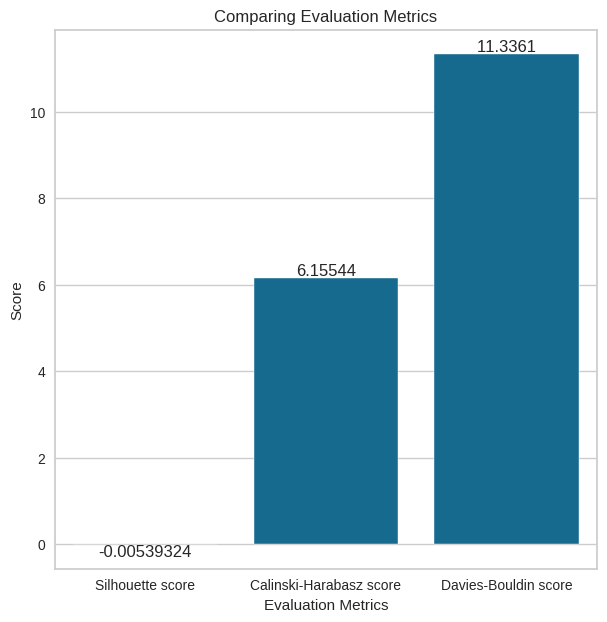

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [ ]:
# Evaluation of Model
hc_eval=hierarchical_clustering_eval(hc, X, y_predict)

In [ ]:
## Assigne Movies and TV Shows to its cluster

# Copy dataset
hc_df=df.copy()

# Droping non original features from dataset
hc_df.drop(columns={'description_len','contractions_description', 'punctuation_%', 'no_sw_pun_description',
                        'clean_description', 'tokenized_description', 'lemmatized_description',
                        'final_description', 'final_description_len'}, axis=1, inplace=True)

# Assigne Movies and TV Shows to its cluster
hc_df['cluster'] = hc.labels_
hc_df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,year,cluster
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,40,International TV Shows,In a future where the elite inhabit an island ...,8.0,2020.0,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0,2
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12.0,2018.0,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,2


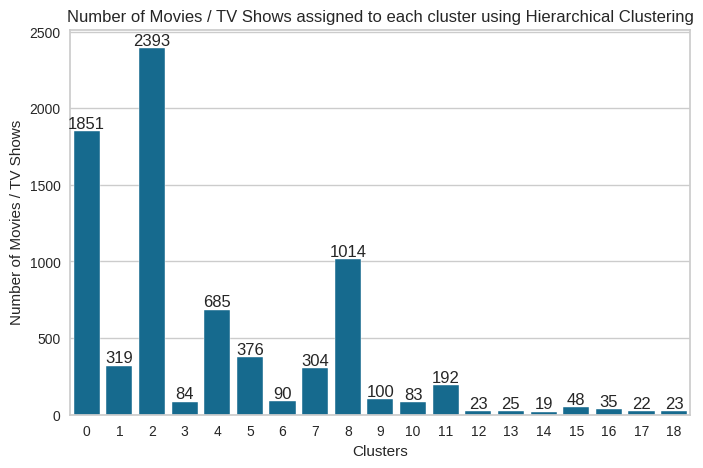

In [ ]:
num_datapoint_in_clusters = hc_df['cluster'].value_counts().reset_index()
num_datapoint_in_clusters.columns = ['cluster', 'count']

# Plotting bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=num_datapoint_in_clusters['cluster'], y=num_datapoint_in_clusters['count'])
ax.bar_label(ax.containers[0])
ax.set_title("Number of Movies / TV Shows assigned to each cluster using Hierarchical Clustering")
ax.set_xlabel("Clusters")
ax.set_ylabel("Number of Movies / TV Shows")

plt.show()

Cluster 2 has the most number of movies and TV shows, followed by clusters 0 and 8.


##### Which hyperparameter optimization technique have you used and why?

For Hierarchical Clustering, Dendrogram Visualization is commonly used for hyperparameter optimization because:Visual Insight,Cutting Point Identification,Linkage Method Assessment,Interpretability,Practical Use

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Hierarchical clustering's evaluation typically focuses on dendrogram-based methods and silhouette scores for validation.
optimizing the linkage method and number of clusters (from 3 to 4) led to improved silhouette scores and better clustering quality, as indicated by lower Davies-Bouldin higher Index values.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a positive business impact in Hierarchical Clustering, the following evaluation metrics are particularly relevant:

Silhouette Score:

Reason: Indicates how well-defined the clusters are, crucial for segmenting customer groups or product categories effectively. Higher scores imply clearer boundaries between clusters, which can lead to more targeted marketing strategies and personalized customer experiences.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the context of the models discussed (K-means clustering, Agglomerative Clustering, and Hierarchical Clustering), the choice of the final prediction model depends on the specific problem and requirements.
Why: Chosen for its simplicity and efficiency in partitioning data into clusters based on centroids. It works well when the number of clusters is predefined and when the clusters are relatively spherical and of similar size.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In K-means clustering, feature importance isn't directly defined as in supervised learning. However, Silhouette Analysis and the Elbow Method are crucial for model interpretation:

Silhouette Analysis assesses cluster cohesion and separation, indirectly indicating feature importance by showing how well features contribute to distinct clusters.

Elbow Method aids in determining the optimal number of clusters
𝑘
k, reflecting how features influence cluster definition and separation at different configurations.

These tools provide insights into which features contribute most significantly to cluster formation and can guide further feature engineering or selection efforts in subsequent analyses.

By understanding how features impact clustering outcomes, businesses can optimize strategies like customer segmentation or operational planning based on clear data-driven insights.

Overall, while K-means doesn't assign explicit feature importance, these interpretability tools enhance understanding and decision-making in clustering analyses.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. It is interesting to note that the majority of the content available on Netflix

2. Netflix consists of movies. However, in recent years, the platform has been focusing more on TV shows.

3.  Most of these shows are released either at the end or the beginning of the year.

4. The United States and India are among the top five countries that produce all of the available content on the platform. Additionally, out of the top ten actors with the maximum content.

5. When it comes to content ratings, TV-MA tops the charts, indicating that mature content is more popular on Netflix.

6. The value of k=17 was found to be optimal for clustering the data, and it was used to group the content into ten distinct clusters.

7. More movies (69.14%) than TV shows (30.86%) are available on Netflix.

8. The majority of Netflix movies were released between 2015 and 2020, and the majority of - Netflix TV shows were released between 2018 and 2020.

9. From 2006 to 2019 Netflix is constantly releasing more new movies than TV shows, but in 2020, it released more TV shows than new movies, indicating that Netflix has been increasingly focusing on TV rather than movies in recent years.

10. The majority of TV shows and movies available on Netflix have a TV-MA rating, with a TV-14 rating coming in second.

11.  The majority of movies added to Netflix in 2019 and the majority of TV shows added to - Netflix in 2020.
In 2019, Netflix added nearly one-fourth (27.71%) of all content (TV shows and movies).

12. The average length of movies and TV shows falling within the range of 50 to 150 minutes can vary depending on the specific content available
on Netflix.

13. The United States and the United Kingdom are the two countries that produced the most of the TV shows that are available on Netflix.

14. Silhouette Score: Indicates how well-defined clusters are, crucial for targeted marketing and personalized services, potentially boosting customer engagement and retention.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***